In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_noisy = pd.read_csv('D:\\Springboard\\Technical Project\\7_Capstone Two\\data\\noisy_data.csv', index_col=0, parse_dates=['date'])
df_noisy.head()

sequence_name tag_position                    date   x_coord   y_coord  \
7            A01   Ankle_Left 2009-05-27 14:03:25.343  3.958496  1.703563   
9            A01   Ankle_Left 2009-05-27 14:03:25.453  4.016991  1.734065   
13           A01   Ankle_Left 2009-05-27 14:03:25.560  3.748375  2.073422   
15           A01   Ankle_Left 2009-05-27 14:03:25.670  3.820894  2.049378   
19           A01   Ankle_Left 2009-05-27 14:03:25.777  4.039506  1.908465   

     z_coord activity        vx        vy        vz  
7   0.511041  walking -1.220181 -1.664489  0.415641  
9   0.193167  walking  0.531769  0.277292 -2.889769  
13  0.254482  walking -2.510430  3.171565  0.573036  
15  0.055377  walking  0.659266 -0.218586 -1.810044  
19  0.453817  walking  2.043107 -1.316940  3.723740

In [3]:
df_noisy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161314 entries, 7 to 164857
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   sequence_name  161314 non-null  object        
 1   tag_position   161314 non-null  object        
 2   date           161314 non-null  datetime64[ns]
 3   x_coord        161314 non-null  float64       
 4   y_coord        161314 non-null  float64       
 5   z_coord        161314 non-null  float64       
 6   activity       161314 non-null  object        
 7   vx             161314 non-null  float64       
 8   vy             161314 non-null  float64       
 9   vz             161314 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 13.5+ MB


In [4]:
def resamp(df, tag, freq='S'):
    df1 = df.resample(freq).mean()
    df1['activity'] = df.resample(freq)['activity'].describe()['top']
    df1.rename(columns={'x_coord':'x_'+tag, 'y_coord':'y_'+tag, 'z_coord':'z_'+tag, 'vx':'vx_'+tag, 'vy':'vy_'+tag, 'vz':'vz_'+tag, 'activity':'activity_'+tag}, inplace=True)
    return df1

In [5]:
df = pd.DataFrame()
for i in df_noisy.sequence_name.unique():
    df_temp2 = pd.DataFrame()
    for j in df_noisy.tag_position.unique():
        df_temp1 = resamp(df_noisy[(df_noisy['sequence_name']==i)&(df_noisy['tag_position']==j)].set_index('date'), j)
        df_temp2 = pd.concat([df_temp2, df_temp1], axis=1)
    df_temp2['sequence_name']=i
    df = df.append(df_temp2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5481 entries, 2009-05-27 14:03:25 to 2009-05-27 11:50:42
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   x_Ankle_Left          5448 non-null   float64
 1   y_Ankle_Left          5448 non-null   float64
 2   z_Ankle_Left          5448 non-null   float64
 3   vx_Ankle_Left         5448 non-null   float64
 4   vy_Ankle_Left         5448 non-null   float64
 5   vz_Ankle_Left         5448 non-null   float64
 6   activity_Ankle_Left   5448 non-null   object 
 7   x_Ankle_Right         5454 non-null   float64
 8   y_Ankle_Right         5454 non-null   float64
 9   z_Ankle_Right         5454 non-null   float64
 10  vx_Ankle_Right        5454 non-null   float64
 11  vy_Ankle_Right        5454 non-null   float64
 12  vz_Ankle_Right        5454 non-null   float64
 13  activity_Ankle_Right  5454 non-null   object 
 14  x_Belt                5433 non-null 

In [7]:
df.loc[df.isnull().any(axis=1), :]

x_Ankle_Left  y_Ankle_Left  z_Ankle_Left  vx_Ankle_Left  \
date                                                                           
2009-05-27 14:03:42      3.243023      1.903068      0.040044       0.115825   
2009-05-27 14:03:43      3.145547      1.989468     -0.057200      -0.153293   
2009-05-27 14:03:44      3.202059      1.927342     -0.146648       0.087584   
2009-05-27 14:03:45      3.206395      1.895523      0.057942       0.007635   
2009-05-27 14:06:37           NaN           NaN           NaN            NaN   
...                           ...           ...           ...            ...   
2009-05-27 11:45:47      1.028347      1.149021     -0.235507       0.596992   
2009-05-27 11:46:24      1.910787      1.748974      0.183007      -0.966959   
2009-05-27 11:47:32           NaN           NaN           NaN            NaN   
2009-05-27 11:48:32      2.997073      1.801743     -0.049157      -0.262046   
2009-05-27 11:50:42      3.209994      1.939577      0.364777      -1.653130   

                     vy_Ankle_Left  vz_Ankle_Left       activity_Ankle_Left  \
date                                                                          
2009-05-27 14:03:42      -0.154834       0.028395                   sitting   
2009-05-27 14:03:43       0.168814      -0.409743                   sitting   
2009-05-27 14:03:44      -0.208338       0.353210                   sitting   
2009-05-27 14:03:45       0.053486       0.010631  standing up from sitting   
2009-05-27 14:06:37            NaN            NaN                       NaN   
...                            ...            ...                       ...   
2009-05-27 11:45:47       0.025380       1.340872                   walking   
2009-05-27 11:46:24       0.122263      -0.096681                   walking   
2009-05-27 11:47:32            NaN            NaN                       NaN   
2009-05-27 11:48:32      -0.223994      -0.367205                   walking   
2009-05-27 11:50:42      -0.608898      -0.283958                   walking   

                     x_Ankle_Right  y_Ankle_Right  z_Ankle_Right  ...  \
date                                                              ...   
2009-05-27 14:03:42            NaN            NaN            NaN  ...   
2009-05-27 14:03:43            NaN            NaN            NaN  ...   
2009-05-27 14:03:44            NaN            NaN            NaN  ...   
2009-05-27 14:03:45            NaN            NaN            NaN  ...   
2009-05-27 14:06:37       2.991685       1.947347      -0.052446  ...   
...                            ...            ...            ...  ...   
2009-05-27 11:45:47       1.034610       1.315100       0.041976  ...   
2009-05-27 11:46:24       2.162201       1.774064       0.323063  ...   
2009-05-27 11:47:32       2.285454       2.108204       0.197686  ...   
2009-05-27 11:48:32            NaN            NaN            NaN  ...   
2009-05-27 11:50:42       3.150169       1.931164       0.055037  ...   

                      vz_Belt             activity_Belt   x_Chest   y_Chest  \
date                                                                          
2009-05-27 14:03:42 -0.042460                   sitting  2.917000  2.516177   
2009-05-27 14:03:43  0.029358                   sitting  2.929863  2.533940   
2009-05-27 14:03:44  0.094103                   sitting  2.924705  2.586177   
2009-05-27 14:03:45 -0.295960  standing up from sitting  3.106200  2.051420   
2009-05-27 14:06:37       NaN                       NaN  3.235618  2.079932   
...                       ...                       ...       ...       ...   
2009-05-27 11:45:47       NaN                       NaN       NaN       NaN   
2009-05-27 11:46:24  0.166002                   walking       NaN       NaN   
2009-05-27 11:47:32 -0.078360                     lying  1.205439  2.434305   
2009-05-27 11:48:32 -0.737217                   walking  2.884092  1.681582   
2009-05-27 11:50:42       NaN                       Na

In [8]:
df.dropna(inplace=True)

In [9]:
df.loc[df.isnull().any(axis=1), :]

Empty DataFrame
Columns: [x_Ankle_Left, y_Ankle_Left, z_Ankle_Left, vx_Ankle_Left, vy_Ankle_Left, vz_Ankle_Left, activity_Ankle_Left, x_Ankle_Right, y_Ankle_Right, z_Ankle_Right, vx_Ankle_Right, vy_Ankle_Right, vz_Ankle_Right, activity_Ankle_Right, x_Belt, y_Belt, z_Belt, vx_Belt, vy_Belt, vz_Belt, activity_Belt, x_Chest, y_Chest, z_Chest, vx_Chest, vy_Chest, vz_Chest, activity_Chest, sequence_name]
Index: []

[0 rows x 29 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5334 entries, 2009-05-27 14:03:25 to 2009-05-27 11:50:41
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   x_Ankle_Left          5334 non-null   float64
 1   y_Ankle_Left          5334 non-null   float64
 2   z_Ankle_Left          5334 non-null   float64
 3   vx_Ankle_Left         5334 non-null   float64
 4   vy_Ankle_Left         5334 non-null   float64
 5   vz_Ankle_Left         5334 non-null   float64
 6   activity_Ankle_Left   5334 non-null   object 
 7   x_Ankle_Right         5334 non-null   float64
 8   y_Ankle_Right         5334 non-null   float64
 9   z_Ankle_Right         5334 non-null   float64
 10  vx_Ankle_Right        5334 non-null   float64
 11  vy_Ankle_Right        5334 non-null   float64
 12  vz_Ankle_Right        5334 non-null   float64
 13  activity_Ankle_Right  5334 non-null   object 
 14  x_Belt                5334 non-null 

In [11]:
mask = (df['activity_Ankle_Left']==df['activity_Ankle_Right'])&(df['activity_Ankle_Right']==df['activity_Belt'])&(df['activity_Belt']==df['activity_Chest'])

In [12]:
df[~mask]

x_Ankle_Left  y_Ankle_Left  z_Ankle_Left  vx_Ankle_Left  \
date                                                                           
2009-05-27 14:04:40      3.362491      1.264681      0.340885       0.305919   
2009-05-27 14:05:06      2.924968      1.549872      0.119655      -0.141810   
2009-05-27 14:06:12      1.860886      1.931271      0.196589      -0.000515   
2009-05-27 14:10:28      2.689202      1.271595      0.214209       0.025012   
2009-05-27 14:10:51      3.239925      1.597936      0.201917       0.349273   
...                           ...           ...           ...            ...   
2009-05-27 11:46:34      3.130117      1.402356      0.617186       0.601344   
2009-05-27 11:47:43      2.065908      1.936933      0.200775      -0.057872   
2009-05-27 11:48:27      3.454868      2.016058     -0.156864      -0.103854   
2009-05-27 11:48:40      3.084264      1.757617     -0.040972       0.455516   
2009-05-27 11:50:02      2.044440      1.838440      0.242273      -0.028972   

                     vy_Ankle_Left  vz_Ankle_Left     activity_Ankle_Left  \
date                                                                        
2009-05-27 14:04:40      -0.373542      -0.455377                 falling   
2009-05-27 14:05:06       0.311175       0.004951                 sitting   
2009-05-27 14:06:12      -0.060178      -0.067157                 walking   
2009-05-27 14:10:28       0.011111      -0.151808            sitting down   
2009-05-27 14:10:51       0.121055      -0.415347                   lying   
...                            ...            ...                     ...   
2009-05-27 11:46:34      -0.382238       0.511215                 falling   
2009-05-27 11:47:43       0.052738      -0.026151                 walking   
2009-05-27 11:48:27      -0.158261      -0.331276                 walking   
2009-05-27 11:48:40       0.450298      -0.133023            sitting down   
2009-05-27 11:50:02       0.082936       0.046011  standing up from lying   

                     x_Ankle_Right  y_Ankle_Right  z_Ankle_Right  ...  \
date                                                              ...   
2009-05-27 14:04:40       3.310933       1.338161       0.368873  ...   
2009-05-27 14:05:06       3.434011       1.243796       0.460031  ...   
2009-05-27 14:06:12       2.149414       2.172647       0.270059  ...   
2009-05-27 14:10:28       2.792379       1.127339       0.082787  ...   
2009-05-27 14:10:51       3.385645       1.426167       0.602845  ...   
...                            ...            ...            ...  ...   
2009-05-27 11:46:34       3.472508       1.103551       0.370750  ...   
2009-05-27 11:47:43       1.973237       1.908538       0.246966  ...   
2009-05-27 11:48:27       3.437239       2.079384       0.452168  ...   
2009-05-27 11:48:40       3.211720       1.418499       0.450081  ...   
2009-05-27 11:50:02       2.044883       1.915326       0.313943  ...   

                      vz_Belt           activity_Belt   x_Chest   y_Chest  \
date                                                                        
2009-05-27 14:04:40 -0.104081                 walking  3.498174  1.586447   
2009-05-27 14:05:06  0.196158                 sitting  3.007513  1.376787   
2009-05-27 14:06:12  9.626458  standing up from lying  1.809521  1.860035   
2009-05-27 14:10:28 -0.500248            sitting down  2.502256  1.300501   
2009-05-27 14:10:51 -0.920037                 falling  4.578415  1.327534   
...                       ...                     ...       ...       ...   
2009-05-27 11:46:34 -1.178470                 falling  4.336126  1.391414   
2009-05-27 11:47:43  0.300620                 walking  2.044369  1.864499   
2009-05-27 11:48:27 -0.139026                 walking  3.454623  2.131212   
2009-05-27 11:48:40  0.141544            sitting down  3.163742  1.450701   
2009-05-27 11:50:02 -0.256120                 walking  2.099187  1.733055   

                      z_Ch

In [13]:
df.drop(index=df[~mask].index, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5225 entries, 2009-05-27 14:03:25 to 2009-05-27 11:50:41
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   x_Ankle_Left          5225 non-null   float64
 1   y_Ankle_Left          5225 non-null   float64
 2   z_Ankle_Left          5225 non-null   float64
 3   vx_Ankle_Left         5225 non-null   float64
 4   vy_Ankle_Left         5225 non-null   float64
 5   vz_Ankle_Left         5225 non-null   float64
 6   activity_Ankle_Left   5225 non-null   object 
 7   x_Ankle_Right         5225 non-null   float64
 8   y_Ankle_Right         5225 non-null   float64
 9   z_Ankle_Right         5225 non-null   float64
 10  vx_Ankle_Right        5225 non-null   float64
 11  vy_Ankle_Right        5225 non-null   float64
 12  vz_Ankle_Right        5225 non-null   float64
 13  activity_Ankle_Right  5225 non-null   object 
 14  x_Belt                5225 non-null 

In [15]:
df.drop(columns=['activity_Ankle_Left', 'activity_Ankle_Right', 'activity_Belt'], inplace=True)

In [16]:
df.rename(columns={'activity_Chest':'activity'}, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5225 entries, 2009-05-27 14:03:25 to 2009-05-27 11:50:41
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x_Ankle_Left    5225 non-null   float64
 1   y_Ankle_Left    5225 non-null   float64
 2   z_Ankle_Left    5225 non-null   float64
 3   vx_Ankle_Left   5225 non-null   float64
 4   vy_Ankle_Left   5225 non-null   float64
 5   vz_Ankle_Left   5225 non-null   float64
 6   x_Ankle_Right   5225 non-null   float64
 7   y_Ankle_Right   5225 non-null   float64
 8   z_Ankle_Right   5225 non-null   float64
 9   vx_Ankle_Right  5225 non-null   float64
 10  vy_Ankle_Right  5225 non-null   float64
 11  vz_Ankle_Right  5225 non-null   float64
 12  x_Belt          5225 non-null   float64
 13  y_Belt          5225 non-null   float64
 14  z_Belt          5225 non-null   float64
 15  vx_Belt         5225 non-null   float64
 16  vy_Belt         5225 non-null   float64
 1

In [18]:
df.head()

x_Ankle_Left  y_Ankle_Left  z_Ankle_Left  vx_Ankle_Left  \
date                                                                           
2009-05-27 14:03:25      3.949630      1.900182      0.344101      -0.079711   
2009-05-27 14:03:26      3.917165      1.931733      0.385538      -0.076668   
2009-05-27 14:03:27      3.972112      1.911377      0.270892      -0.013374   
2009-05-27 14:03:28      3.813769      1.960127      0.238826      -0.887688   
2009-05-27 14:03:29      3.103102      1.863375     -0.119401       0.037925   

                     vy_Ankle_Left  vz_Ankle_Left  x_Ankle_Right  \
date                                                               
2009-05-27 14:03:25       0.035407      -0.001367       4.397413   
2009-05-27 14:03:26      -0.136994      -0.077359       4.400462   
2009-05-27 14:03:27       0.165018      -0.173723       4.246819   
2009-05-27 14:03:28       0.057083      -0.730547       3.519329   
2009-05-27 14:03:29       0.053552       0.005987       3.160081   

                     y_Ankle_Right  z_Ankle_Right  vx_Ankle_Right  ...  \
date                                                               ...   
2009-05-27 14:03:25       1.884623       0.541615        0.187762  ...   
2009-05-27 14:03:26       1.924077       0.451020        0.095132  ...   
2009-05-27 14:03:27       1.971187       0.378625       -0.723113  ...   
2009-05-27 14:03:28       2.044926       0.279882       -0.459889  ...   
2009-05-27 14:03:29       2.149590       0.058288       -0.601484  ...   

                      vy_Belt   vz_Belt   x_Chest   y_Chest   z_Chest  \
date                                                                    
2009-05-27 14:03:25  0.138495  0.231894  4.266197  2.044952  1.361703   
2009-05-27 14:03:26  0.012306 -0.041263  4.224487  2.099005  1.343999   
2009-05-27 14:03:27 -0.210173 -0.113544  4.242987  1.708852  1.238243   
2009-05-27 14:03:28  0.209605 -0.136504  3.602022  1.914348  1.166328   
2009-05-27 14:03:29 -0.478712 -0.006246  3.251345  1.881694  1.067989   

                     vx_Chest  vy_Chest  vz_Chest      activity  sequence_name  
date                                                                            
2009-05-27 14:03:25 -0.230549  0.679089  0.195658       walking            A01  
2009-05-27 14:03:26 -0.036045 -0.087481 -0.116864       walking            A01  
2009-05-27 14:03:27 -0.400486 -0.039284 -0.066494       walking            A01  
2009-05-27 14:03:28 -0.600955  0.228505 -0.174320       walking            A01  
2009-05-27 14:03:29 -0.207224 -0.152918 -0.184875  sitting down            A01  

[5 rows x 26 columns]

In [19]:
df.describe()

x_Ankle_Left  y_Ankle_Left  z_Ankle_Left  vx_Ankle_Left  vy_Ankle_Left  \
count   5225.000000   5225.000000   5225.000000    5225.000000    5225.000000   
mean       2.891793      1.733892      0.244607       0.000738       0.000072   
std        0.684717      0.423913      0.217350       0.290594       0.281039   
min        0.436510      0.402867     -0.688003      -2.946407      -3.150650   
25%        2.513515      1.392373      0.098313      -0.081861      -0.103159   
50%        2.936746      1.696934      0.249928       0.001269       0.001385   
75%        3.360752      1.997114      0.399945       0.085792       0.100156   
max        4.887819      3.010681      1.743137       2.487181       3.545487   

       vz_Ankle_Left  x_Ankle_Right  y_Ankle_Right  z_Ankle_Right  \
count    5225.000000    5225.000000    5225.000000    5225.000000   
mean       -0.000644       2.859317       1.677734       0.236602   
std         0.258514       0.715651       0.420666       0.207375   
min        -3.017377       0.713079       0.224017      -0.808868   
25%        -0.104200       2.439723       1.360634       0.104452   
50%         0.000412       2.878488       1.677522       0.251460   
75%         0.100782       3.385390       1.985906       0.382799   
max         2.547613       5.244433       2.814089       1.031581   

       vx_Ankle_Right  ...       z_Belt      vx_Belt      vy_Belt  \
count     5225.000000  ...  5225.000000  5225.000000  5225.000000   
mean         0.005366  ...     0.527464     0.010731     0.005627   
std          0.312724  ...     0.296150     0.522384     0.381187   
min         -2.216319  ...    -0.817816    -6.583235    -5.376432   
25%         -0.089461  ...     0.304298    -0.108219    -0.112047   
50%          0.000770  ...     0.511373     0.001344     0.000111   
75%          0.091056  ...     0.773563     0.121507     0.117548   
max          4.613234  ...     1.726200     6.361052     9.332507   

           vz_Belt      x_Chest      y_Chest      z_Chest     vx_Chest  \
count  5225.000000  5225.000000  5225.000000  5225.000000  5225.000000   
mean      0.011043     2.727046     1.696588     0.690540     0.002758   
std       0.345358     1.170269     0.487461     0.404477     0.393669   
min      -2.567182     0.442039    -0.134738    -0.700609    -6.717074   
25%      -0.101625     1.630330     1.328984     0.338806    -0.104111   
50%       0.001460     2.754631     1.590823     0.651098     0.001012   
75%       0.114244     3.503881     2.124412     1.024505     0.110034   
max       4.157009     5.493141     3.695088     1.902222     4.507927   

          vy_Chest     vz_Chest  
count  5225.000000  5225.000000  
mean      0.000012     0.003629  
std       0.306071     0.294052  
min      -4.580270    -6.286113  
25%      -0.109046    -0.100980  
50%      -0.000738     0.003366  
75%       0.108989     0.108379  
max       2.898207     3.036914  

[8 rows x 24 columns]

In [20]:
df.describe(include='object')

activity sequence_name
count      5225          5225
unique       11            25
top       lying           E01
freq       1743           296

In [21]:
df.activity.value_counts()

lying                                     1743
walking                                   1052
sitting                                    864
standing up from lying                     584
sitting on the ground                      384
lying down                                 188
on all fours                               166
standing up from sitting on the ground      88
falling                                     78
sitting down                                40
standing up from sitting                    38
Name: activity, dtype: int64

In [22]:
df.activity.value_counts(normalize=True)

lying                                     0.333589
walking                                   0.201340
sitting                                   0.165359
standing up from lying                    0.111770
sitting on the ground                     0.073493
lying down                                0.035981
on all fours                              0.031770
standing up from sitting on the ground    0.016842
falling                                   0.014928
sitting down                              0.007656
standing up from sitting                  0.007273
Name: activity, dtype: float64

In [23]:
# Defining a function to calculate distance between two z coordinates
def z_dist(z1, z2):
    z_d = z2-z1
    return z_d

# Defining a function to calculate absolute distance
def abs_dist(x1, y1, z1, x2, y2, z2):
    abs_d = np.sqrt((x2-x1)**2+(y2-y1)**2+(z2-z1)**2)
    return abs_d

# Defining a function to calculate absolute distance between each combination of tag
def abs_dist_calc(df, tag, name):
    df2=pd.DataFrame()
    for i in range(len(tag)-1):
        for j in range(i+1, len(tag)):
            df_temp = abs_dist(df['x_'+tag[i]], df['y_'+tag[i]], df['z_'+tag[i]], df['x_'+tag[j]], df['y_'+tag[j]], df['z_'+tag[j]])
            df_temp = pd.DataFrame(df_temp, columns=[name+'_'+tag[i]+'_'+tag[j]])
            df2 = pd.concat([df2, df_temp], axis=1)
    return df2

# Defining a function to distance in z direction between each combination of tag
def z_dist_calc(df, tag, name):
    df2=pd.DataFrame()
    for i in range(len(tag)-1):
        for j in range(i+1, len(tag)):
            df_temp = z_dist(df['z_'+tag[i]], df['z_'+tag[j]])
            df_temp = pd.DataFrame(df_temp, columns=[name+'_'+tag[i]+'_'+tag[j]])
            df2 = pd.concat([df2, df_temp], axis=1)
    return df2

In [24]:
# Defining reference attributes (initializing this as dataframe RA)

# Defining z coordinate of each tag and vz of each tag
RA = df[['z_Ankle_Left', 'z_Ankle_Right', 'z_Belt', 'z_Chest', 'vz_Ankle_Left', 'vz_Ankle_Right', 'vz_Belt', 'vz_Chest']]

# Defining absolute velocity of each tag
RA['abs_v_Ankle_Left'] = np.sqrt(df['vx_Ankle_Left']**2+df['vy_Ankle_Left']**2+df['vz_Ankle_Left']**2)
RA['abs_v_Ankle_Right'] = np.sqrt(df['vx_Ankle_Right']**2+df['vy_Ankle_Right']**2+df['vz_Ankle_Right']**2)
RA['abs_v_Belt'] = np.sqrt(df['vx_Belt']**2+df['vy_Belt']**2+df['vz_Belt']**2)
RA['abs_v_Chest'] = np.sqrt(df['vx_Chest']**2+df['vy_Chest']**2+df['vz_Chest']**2)

tag = ['Ankle_Left', 'Ankle_Right', 'Belt', 'Chest']

# Defining absolute distance between each combination of tags
RA = pd.concat([RA, abs_dist_calc(df, tag, 'abs_dist')], axis=1)

# Defining distance in z direction between each combination of tags
RA = pd.concat([RA, z_dist_calc(df, tag, 'z_dist')], axis=1)

C:\Users\prash\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\prash\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\prash\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [25]:
RA.head()

z_Ankle_Left  z_Ankle_Right    z_Belt   z_Chest  \
date                                                                   
2009-05-27 14:03:25      0.344101       0.541615  0.966463  1.361703   
2009-05-27 14:03:26      0.385538       0.451020  1.001638  1.343999   
2009-05-27 14:03:27      0.270892       0.378625  0.911223  1.238243   
2009-05-27 14:03:28      0.238826       0.279882  0.814996  1.166328   
2009-05-27 14:03:29     -0.119401       0.058288  0.720816  1.067989   

                     vz_Ankle_Left  vz_Ankle_Right   vz_Belt  vz_Chest  \
date                                                                     
2009-05-27 14:03:25      -0.001367        0.182205  0.231894  0.195658   
2009-05-27 14:03:26      -0.077359       -0.072052 -0.041263 -0.116864   
2009-05-27 14:03:27      -0.173723       -0.390719 -0.113544 -0.066494   
2009-05-27 14:03:28      -0.730547       -0.030818 -0.136504 -0.174320   
2009-05-27 14:03:29       0.005987        0.036619 -0.006246 -0.184875   

                     abs_v_Ankle_Left  abs_v_Ankle_Right  ...  \
date                                                      ...   
2009-05-27 14:03:25          0.087232           0.644690  ...   
2009-05-27 14:03:26          0.175014           0.145237  ...   
2009-05-27 14:03:27          0.239978           0.882407  ...   
2009-05-27 14:03:28          1.151064           0.465067  ...   
2009-05-27 14:03:29          0.065893           0.695165  ...   

                     abs_dist_Ankle_Left_Chest  abs_dist_Ankle_Right_Belt  \
date                                                                        
2009-05-27 14:03:25                   1.075494                   0.425433   
2009-05-27 14:03:26                   1.020330                   0.551286   
2009-05-27 14:03:27                   1.024772                   0.543142   
2009-05-27 14:03:28                   0.952467                   0.565298   
2009-05-27 14:03:29                   1.196748                   0.706657   

                     abs_dist_Ankle_Right_Chest  abs_dist_Belt_Chest  \
date                                                                   
2009-05-27 14:03:25                    0.845853             0.448744   
2009-05-27 14:03:26                    0.926811             0.412280   
2009-05-27 14:03:27                    0.898765             0.380703   
2009-05-27 14:03:28                    0.899820             0.445874   
2009-05-27 14:03:29                    1.048615             0.349209   

                     z_dist_Ankle_Left_Ankle_Right  z_dist_Ankle_Left_Belt  \
date                                                                         
2009-05-27 14:03:25                       0.197514                0.622362   
2009-05-27 14:03:26                       0.065482                0.616100   
2009-05-27 14:03:27                       0.107733                0.640331   
2009-05-27 14:03:28                       0.041056                0.576171   
2009-05-27 14:03:29                       0.177688                0.840217   

                     z_dist_Ankle_Left_Chest  z_dist_Ankle_Right_Belt  \
date                                                                    
2009-05-27 14:03:25                 1.017602                 0.424848   
2009-05-27 14:03:26                 0.958461                 0.550618   
2009-05-27 14:03:27                 0.967351                 0.532598   
2009-05-27 14:03:28                 0.927503                 0.535114   
2009-05-27 14:03:29                 1.187390                 0.662529   

                     z_dist_Ankle_Right_Chest  z_dist_Belt_Chest  
date                                                              
2009-05-27 14:03:25                  0.820088           0.395240  
2009-05-27 14:03:26                  0.892980           0.342361  
2009-05-27 14:03:27                  0.859618           0.327020  
2009-05-27 14:03:28                  0.886446           0.351332  
2009-05-27 14:03:29                

In [26]:
RA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5225 entries, 2009-05-27 14:03:25 to 2009-05-27 11:50:41
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   z_Ankle_Left                     5225 non-null   float64
 1   z_Ankle_Right                    5225 non-null   float64
 2   z_Belt                           5225 non-null   float64
 3   z_Chest                          5225 non-null   float64
 4   vz_Ankle_Left                    5225 non-null   float64
 5   vz_Ankle_Right                   5225 non-null   float64
 6   vz_Belt                          5225 non-null   float64
 7   vz_Chest                         5225 non-null   float64
 8   abs_v_Ankle_Left                 5225 non-null   float64
 9   abs_v_Ankle_Right                5225 non-null   float64
 10  abs_v_Belt                       5225 non-null   float64
 11  abs_v_Chest                      5225 non-null

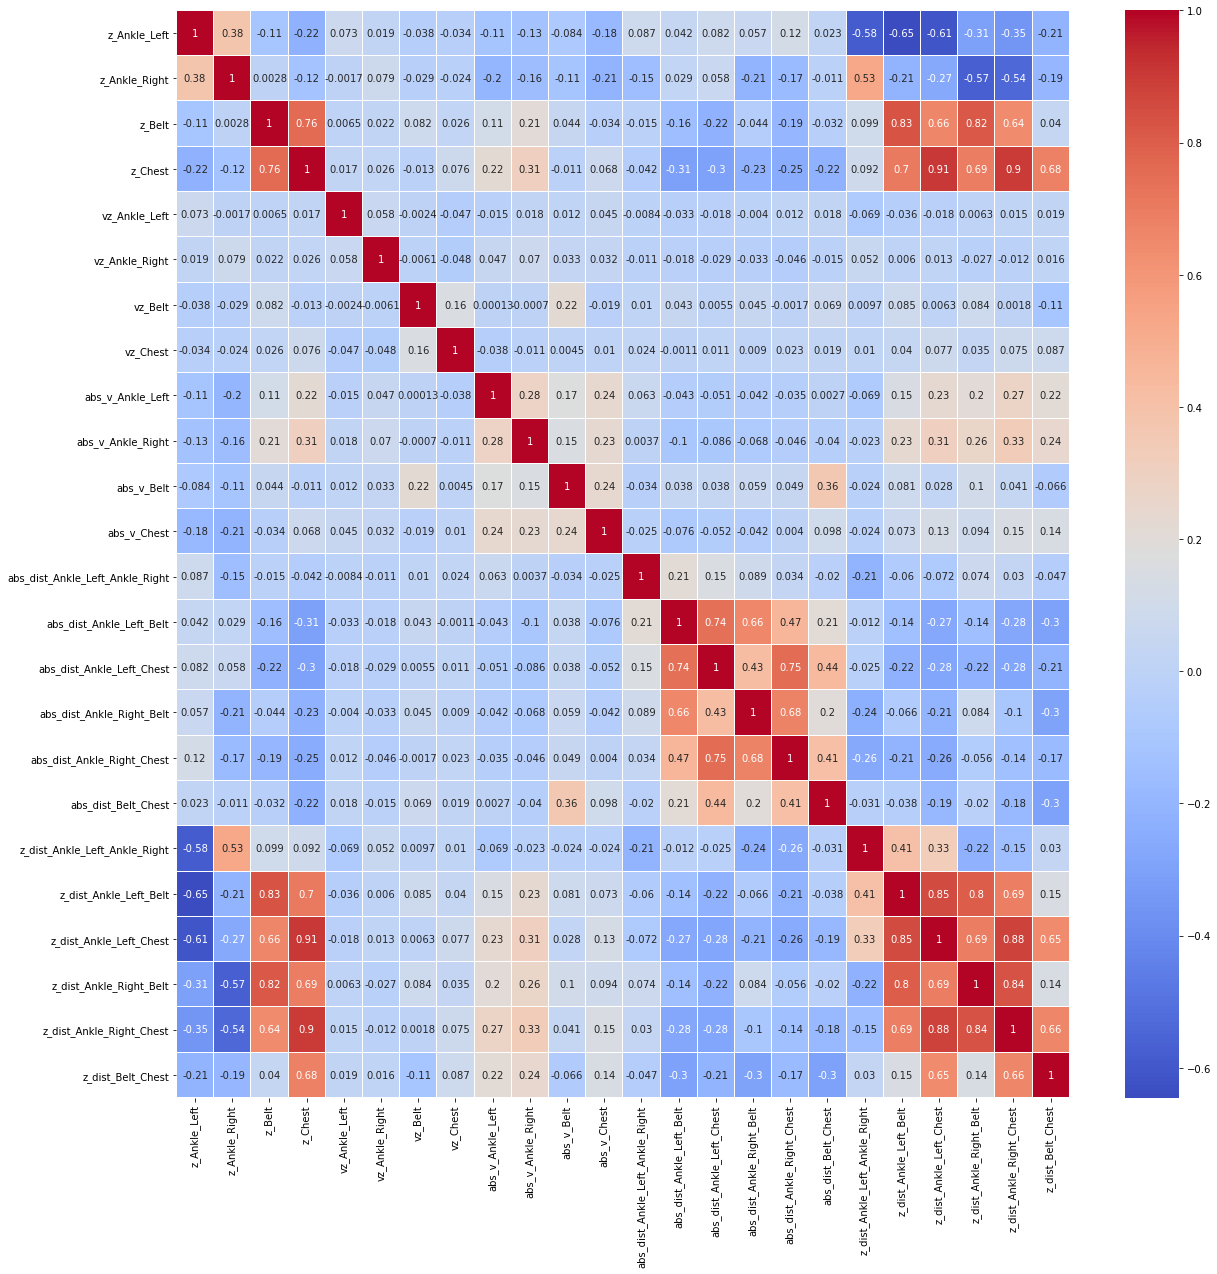

In [27]:
# Plotting the heatmap for correlating features
plt.subplots(figsize=(20,20))
_ = sns.heatmap(RA.corr(), annot=True, linewidths=0.1, cmap='coolwarm')
plt.show()

In [28]:
# Defining Body Attributes

ox, oy, oz = df['x_Belt'], df['y_Belt'], df['z_Belt'] # defining origin as the coordinates of belt tag

kx, ky, kz = df['x_Chest']-ox, df['y_Chest']-oy, df['z_Chest']-oz # defining z direction of body reference
kx, ky, kz = kx/np.sqrt(kx**2+ky**2+kz**2), ky/np.sqrt(kx**2+ky**2+kz**2), kz/np.sqrt(kx**2+ky**2+kz**2) # converting to unit vector

jx, jy, jz = 1, 1, -(kx+ky)/kz # assuming y direction of body reference such that j.k=0
jx, jy, jz = jx/np.sqrt(jx**2+jy**2+jz**2), jy/np.sqrt(jx**2+jy**2+jz**2), jz/np.sqrt(jx**2+jy**2+jz**2) # converting to unit vector

ix, iy, iz = (jy*kz-ky*jz), -(jx*kz-jz*kx), (jx*ky-kx*jy) # calculating x direction of body reference by jxk

# Create a Dataframe which is used for transformation
pos_vect = pd.DataFrame({'ox':ox, 'oy':oy, 'oz':oz, 'ix':ix, 'iy':iy, 'iz':iz, 'jx':jx, 'jy':jy, 'jz':jz, 'kx':kx, 'ky':ky, 'kz':kz})

# Defining Transformed Coordinates
def trans_pos(pos_vect, pos):
    o_vect = np.array([pos_vect.ox, pos_vect.oy, pos_vect.oz]).reshape(1,3)
    i_vect = np.array([pos_vect.ix, pos_vect.iy, pos_vect.iz]).reshape(1,3)
    j_vect = np.array([pos_vect.jx, pos_vect.jy, pos_vect.jz]).reshape(1,3)
    k_vect = np.array([pos_vect.kx, pos_vect.ky, pos_vect.kz]).reshape(1,3)
    Trb = np.concatenate([i_vect, j_vect, k_vect], axis=0)
    dot_mat = np.array([-np.dot(o_vect,i_vect.T).item(), -np.dot(o_vect,j_vect.T).item(), -np.dot(o_vect,k_vect.T).item()]).reshape(3,1)
    Trb = np.concatenate([Trb, dot_mat], axis=1)
    Trb = np.concatenate([Trb, np.array([0,0,0,1]).reshape(1,4)], axis=0)
    x, y, z = np.dot(Trb, pos)[0].item(), np.dot(Trb, pos)[1].item(), np.dot(Trb, pos)[2].item()
    return x, y, z

In [29]:
BA = pd.DataFrame()
tag = ['Ankle_Left', 'Ankle_Right', 'Chest']
for j in tag:
    s1, s2, s3 = list(), list(), list()
    for i in range(len(df)):
        pos = np.array([df['x_'+j].iloc[i], df['y_'+j].iloc[i], df['z_'+j].iloc[i], 1]).reshape(4,1)
        x1, y1, z1 = trans_pos(pos_vect.iloc[i], pos)
        s1.append(x1)
        s2.append(y1)
        s3.append(z1)
    BA = pd.concat([BA, pd.DataFrame({'x_b_'+j:s1, 'y_b_'+j:s2, 'z_b_'+j:s3})], axis=1)
BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   x_b_Ankle_Left   5225 non-null   float64
 1   y_b_Ankle_Left   5225 non-null   float64
 2   z_b_Ankle_Left   5225 non-null   float64
 3   x_b_Ankle_Right  5225 non-null   float64
 4   y_b_Ankle_Right  5225 non-null   float64
 5   z_b_Ankle_Right  5225 non-null   float64
 6   x_b_Chest        5225 non-null   float64
 7   y_b_Chest        5225 non-null   float64
 8   z_b_Chest        5225 non-null   float64
dtypes: float64(9)
memory usage: 367.5 KB


In [30]:
BA.head()

x_b_Ankle_Left  y_b_Ankle_Left  z_b_Ankle_Left  x_b_Ankle_Right  \
0       -0.588553       -0.328298       -0.389417        -0.206749   
1       -0.623901       -0.283469       -0.343675        -0.288826   
2        0.134139       -0.281814       -0.595384         0.246829   
3        0.549110        0.475046       -0.170570         0.330856   
4        0.029987       -0.157330       -0.836773        -0.148644   

   y_b_Ankle_Right  z_b_Ankle_Right     x_b_Chest     y_b_Chest  z_b_Chest  
0        -0.022265        -0.371151  0.000000e+00  8.881784e-16   0.448744  
1         0.048844        -0.467023  0.000000e+00  8.881784e-16   0.412280  
2        -0.026192        -0.483107 -4.440892e-16 -8.881784e-16   0.380703  
3         0.321528        -0.326674  0.000000e+00  0.000000e+00   0.445874  
4         0.091139        -0.684808 -3.330669e-16  0.000000e+00   0.349209

In [31]:
# For velocity reference velocity will be 0,0,0 only and the velocity components
def trans_vel(pos_vect, pos):
    o_vect = np.array([0, 0, 0]).reshape(1,3)
    i_vect = np.array([pos_vect.ix, pos_vect.iy, pos_vect.iz]).reshape(1,3)
    j_vect = np.array([pos_vect.jx, pos_vect.jy, pos_vect.jz]).reshape(1,3)
    k_vect = np.array([pos_vect.kx, pos_vect.ky, pos_vect.kz]).reshape(1,3)
    Trb = np.concatenate([i_vect, j_vect, k_vect], axis=0)
    dot_mat = np.array([-np.dot(o_vect,i_vect.T).item(), -np.dot(o_vect,j_vect.T).item(), -np.dot(o_vect,k_vect.T).item()]).reshape(3,1)
    Trb = np.concatenate([Trb, dot_mat], axis=1)
    Trb = np.concatenate([Trb, np.array([0,0,0,1]).reshape(1,4)], axis=0)
    x, y, z = np.dot(Trb, pos)[0].item(), np.dot(Trb, pos)[1].item(), np.dot(Trb, pos)[2].item()
    return x, y, z

# Creating Velocity Dataframe
Vel_df = pd.DataFrame()
tag = ['Ankle_Left', 'Ankle_Right', 'Belt', 'Chest']
for j in tag:
    s1, s2, s3 = list(), list(), list()
    for i in range(len(df)):
        pos = np.array([df['vx_'+j].iloc[i], df['vy_'+j].iloc[i], df['vz_'+j].iloc[i], 1]).reshape(4,1)
        x1, y1, z1 = trans_vel(pos_vect.iloc[i], pos)
        s1.append(x1)
        s2.append(y1)
        s3.append(z1)
    Vel_df = pd.concat([Vel_df, pd.DataFrame({'vx_b_'+j:s1, 'vy_b_'+j:s2, 'vz_b_'+j:s3})], axis=1)
Vel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vx_b_Ankle_Left   5225 non-null   float64
 1   vy_b_Ankle_Left   5225 non-null   float64
 2   vz_b_Ankle_Left   5225 non-null   float64
 3   vx_b_Ankle_Right  5225 non-null   float64
 4   vy_b_Ankle_Right  5225 non-null   float64
 5   vz_b_Ankle_Right  5225 non-null   float64
 6   vx_b_Belt         5225 non-null   float64
 7   vy_b_Belt         5225 non-null   float64
 8   vz_b_Belt         5225 non-null   float64
 9   vx_b_Chest        5225 non-null   float64
 10  vy_b_Chest        5225 non-null   float64
 11  vz_b_Chest        5225 non-null   float64
dtypes: float64(12)
memory usage: 490.0 KB


In [32]:
Vel_df.head()

vx_b_Ankle_Left  vy_b_Ankle_Left  vz_b_Ankle_Left  vx_b_Ankle_Right  \
0        -0.072313        -0.031330         0.037399          0.570456   
1        -0.011944        -0.146696        -0.094697          0.064925   
2        -0.021298         0.061828        -0.230897         -0.509783   
3        -0.069696        -0.316510        -1.104496         -0.240802   
4        -0.011384         0.064847         0.002671         -0.671229   

   vy_b_Ankle_Right  vz_b_Ankle_Right  vx_b_Belt  vy_b_Belt  vz_b_Belt  \
0         -0.283494         -0.099171   0.087675   0.171392   0.215749   
1          0.012604         -0.129305  -0.021998   0.020023  -0.033701   
2         -0.370663         -0.617553  -0.071967  -0.402973  -0.056015   
3         -0.255873         -0.304682  -0.367557  -0.232723  -0.513176   
4         -0.178909         -0.026405   0.156942  -0.518007   0.027292   

   vx_b_Chest  vy_b_Chest  vz_b_Chest  
0   -0.474179    0.317565    0.476343  
1   -0.037172   -0.080923   -0.121157  
2   -0.231284   -0.317803   -0.108916  
3   -0.350479   -0.191983   -0.532969  
4   -0.020109   -0.260685   -0.179285

In [33]:
# Creating Absolute Velocity of each tag
BA['abs_v_b_Ankle_Left'] = np.sqrt(Vel_df['vx_b_Ankle_Left']**2+Vel_df['vy_b_Ankle_Left']**2+Vel_df['vz_b_Ankle_Left']**2)
BA['abs_v_b_Ankle_Right'] = np.sqrt(Vel_df['vx_b_Ankle_Right']**2+Vel_df['vy_b_Ankle_Right']**2+Vel_df['vz_b_Ankle_Right']**2)
BA['abs_v_b_Belt'] = np.sqrt(Vel_df['vx_b_Belt']**2+Vel_df['vy_b_Belt']**2+Vel_df['vz_b_Belt']**2)
BA['abs_v_b_Chest'] = np.sqrt(Vel_df['vx_b_Chest']**2+Vel_df['vy_b_Chest']**2+Vel_df['vz_b_Chest']**2)

In [34]:
# Creating z coordinate and absolute velocity of origin i.e. belt
BA['z_orig'] = df.reset_index().z_Belt
BA['v_or'] = np.sqrt(df.reset_index()['vx_Belt']**2+df.reset_index()['vy_Belt']**2+df.reset_index()['vz_Belt']**2)

In [35]:
BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x_b_Ankle_Left       5225 non-null   float64
 1   y_b_Ankle_Left       5225 non-null   float64
 2   z_b_Ankle_Left       5225 non-null   float64
 3   x_b_Ankle_Right      5225 non-null   float64
 4   y_b_Ankle_Right      5225 non-null   float64
 5   z_b_Ankle_Right      5225 non-null   float64
 6   x_b_Chest            5225 non-null   float64
 7   y_b_Chest            5225 non-null   float64
 8   z_b_Chest            5225 non-null   float64
 9   abs_v_b_Ankle_Left   5225 non-null   float64
 10  abs_v_b_Ankle_Right  5225 non-null   float64
 11  abs_v_b_Belt         5225 non-null   float64
 12  abs_v_b_Chest        5225 non-null   float64
 13  z_orig               5225 non-null   float64
 14  v_or                 5225 non-null   float64
dtypes: float64(15)
memory usage: 612.4 KB


In [36]:
# Creating Angles of movement of tag w.r.t z axis and xz plane
# Angles are denoted by the dot product of the two vectors hence we will calculate the dot product of velocities
# of the tag wit z axis and y axis (because 90-angle with y axis is angle with xz plane)
# Dot product of velocity of each tag with z axis is basically vz_b_ and with y axis is vy_b_
temp1 = Vel_df[['vz_b_Ankle_Left']].divide(BA['abs_v_b_Ankle_Left'], axis=0)
temp1.rename({'vz_b_Ankle_Left':'ang_Ankle_Left_z'}, inplace=True, axis=1)
temp2 = Vel_df[['vz_b_Ankle_Right']].divide(BA['abs_v_b_Ankle_Right'], axis=0)
temp2.rename({'vz_b_Ankle_Right':'ang_Ankle_Right_z'}, inplace=True, axis=1)
temp3 = Vel_df[['vz_b_Belt']].divide(BA['abs_v_b_Belt'], axis=0)
temp3.rename({'vz_b_Belt':'ang_Belt_z'}, inplace=True, axis=1)
temp4 = Vel_df[['vz_b_Chest']].divide(BA['abs_v_b_Chest'], axis=0)
temp4.rename({'vz_b_Chest':'ang_Chest_z'}, inplace=True, axis=1)
temp5 = Vel_df[['vy_b_Ankle_Left']].divide(BA['abs_v_b_Ankle_Left'], axis=0)
temp5.rename({'vy_b_Ankle_Left':'ang_Ankle_Left_y'}, inplace=True, axis=1)
temp6 = Vel_df[['vy_b_Ankle_Right']].divide(BA['abs_v_b_Ankle_Right'], axis=0)
temp6.rename({'vy_b_Ankle_Right':'ang_Ankle_Right_y'}, inplace=True, axis=1)
temp7 = Vel_df[['vy_b_Belt']].divide(BA['abs_v_b_Belt'], axis=0)
temp7.rename({'vy_b_Belt':'ang_Belt_y'}, inplace=True, axis=1)
temp8 = Vel_df[['vy_b_Chest']].divide(BA['abs_v_b_Chest'], axis=0)
temp8.rename({'vy_b_Chest':'ang_Chest_y'}, inplace=True, axis=1)
BA = pd.concat([BA, temp1, temp2, temp3, temp4, temp5, temp6, temp7, temp8], axis=1)
BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x_b_Ankle_Left       5225 non-null   float64
 1   y_b_Ankle_Left       5225 non-null   float64
 2   z_b_Ankle_Left       5225 non-null   float64
 3   x_b_Ankle_Right      5225 non-null   float64
 4   y_b_Ankle_Right      5225 non-null   float64
 5   z_b_Ankle_Right      5225 non-null   float64
 6   x_b_Chest            5225 non-null   float64
 7   y_b_Chest            5225 non-null   float64
 8   z_b_Chest            5225 non-null   float64
 9   abs_v_b_Ankle_Left   5225 non-null   float64
 10  abs_v_b_Ankle_Right  5225 non-null   float64
 11  abs_v_b_Belt         5225 non-null   float64
 12  abs_v_b_Chest        5225 non-null   float64
 13  z_orig               5225 non-null   float64
 14  v_or                 5225 non-null   float64
 15  ang_Ankle_Left_z     5225 non-null   f

In [37]:
# Creating direction of x axis with gloabl z axis and y axis
BA = pd.concat([BA, pos_vect.reset_index()[['iy', 'iz']]], axis=1)
BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x_b_Ankle_Left       5225 non-null   float64
 1   y_b_Ankle_Left       5225 non-null   float64
 2   z_b_Ankle_Left       5225 non-null   float64
 3   x_b_Ankle_Right      5225 non-null   float64
 4   y_b_Ankle_Right      5225 non-null   float64
 5   z_b_Ankle_Right      5225 non-null   float64
 6   x_b_Chest            5225 non-null   float64
 7   y_b_Chest            5225 non-null   float64
 8   z_b_Chest            5225 non-null   float64
 9   abs_v_b_Ankle_Left   5225 non-null   float64
 10  abs_v_b_Ankle_Right  5225 non-null   float64
 11  abs_v_b_Belt         5225 non-null   float64
 12  abs_v_b_Chest        5225 non-null   float64
 13  z_orig               5225 non-null   float64
 14  v_or                 5225 non-null   float64
 15  ang_Ankle_Left_z     5225 non-null   f

In [38]:
# Creating angles of movement of origin with global z axis and global y axis
# This is nothing but vz_Belt and vy_belt normalize
temp1 = df[['vy_Belt']].divide(RA['abs_v_Belt'], axis=0)
temp2 = df[['vz_Belt']].divide(RA['abs_v_Belt'], axis=0)
temp1.rename({'vy_Belt':'ang_orig_xz'}, axis=1, inplace=True)
temp2.rename({'vz_Belt':'ang_orig_z'}, axis=1, inplace=True)
BA = pd.concat([BA, temp1.reset_index(drop=True), temp2.reset_index(drop=True)], axis=1)
BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x_b_Ankle_Left       5225 non-null   float64
 1   y_b_Ankle_Left       5225 non-null   float64
 2   z_b_Ankle_Left       5225 non-null   float64
 3   x_b_Ankle_Right      5225 non-null   float64
 4   y_b_Ankle_Right      5225 non-null   float64
 5   z_b_Ankle_Right      5225 non-null   float64
 6   x_b_Chest            5225 non-null   float64
 7   y_b_Chest            5225 non-null   float64
 8   z_b_Chest            5225 non-null   float64
 9   abs_v_b_Ankle_Left   5225 non-null   float64
 10  abs_v_b_Ankle_Right  5225 non-null   float64
 11  abs_v_b_Belt         5225 non-null   float64
 12  abs_v_b_Chest        5225 non-null   float64
 13  z_orig               5225 non-null   float64
 14  v_or                 5225 non-null   float64
 15  ang_Ankle_Left_z     5225 non-null   f

In [39]:
# Lets drop the x and y of chest tag since it is always be zero
BA.drop(columns=['x_b_Chest', 'y_b_Chest'], inplace=True)
BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x_b_Ankle_Left       5225 non-null   float64
 1   y_b_Ankle_Left       5225 non-null   float64
 2   z_b_Ankle_Left       5225 non-null   float64
 3   x_b_Ankle_Right      5225 non-null   float64
 4   y_b_Ankle_Right      5225 non-null   float64
 5   z_b_Ankle_Right      5225 non-null   float64
 6   z_b_Chest            5225 non-null   float64
 7   abs_v_b_Ankle_Left   5225 non-null   float64
 8   abs_v_b_Ankle_Right  5225 non-null   float64
 9   abs_v_b_Belt         5225 non-null   float64
 10  abs_v_b_Chest        5225 non-null   float64
 11  z_orig               5225 non-null   float64
 12  v_or                 5225 non-null   float64
 13  ang_Ankle_Left_z     5225 non-null   float64
 14  ang_Ankle_Right_z    5225 non-null   float64
 15  ang_Belt_z           5225 non-null   f

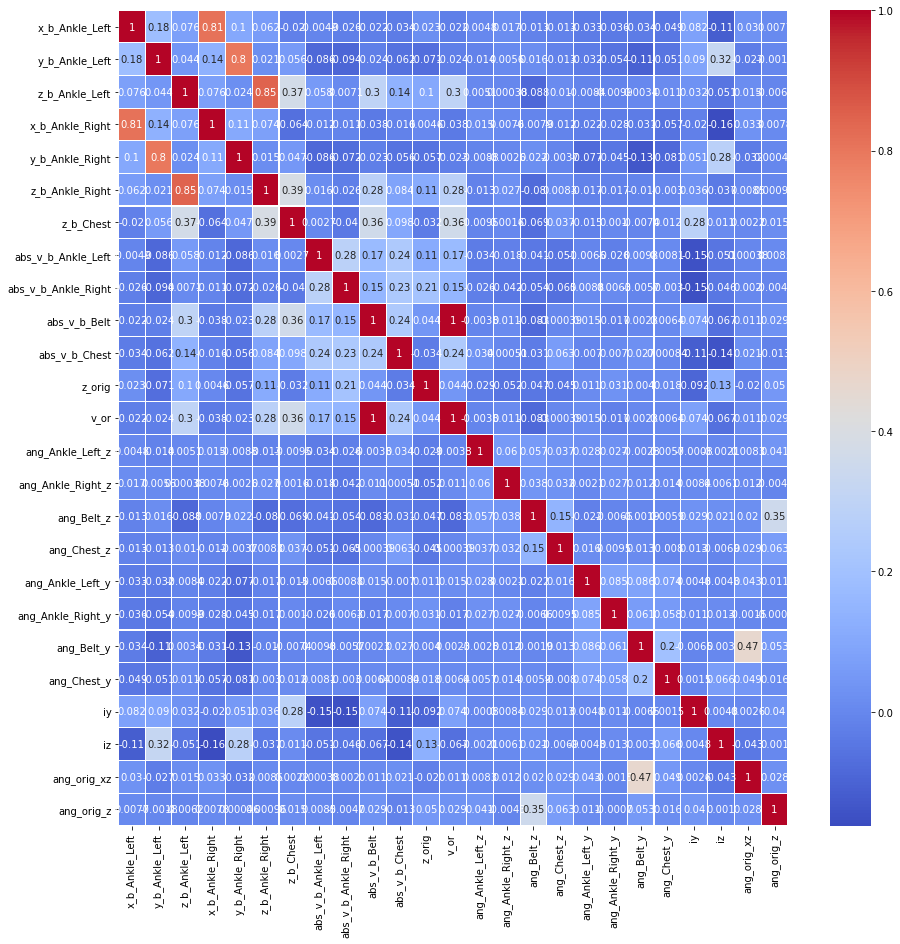

In [40]:
# Plotting the heatmap for correlating features
plt.subplots(figsize=(15,15))
_ = sns.heatmap(BA.corr(), annot=True, linewidths=0.1, cmap='coolwarm')
plt.show()

In [41]:
# Dropping the v_or from attributes
BA.drop(columns=['v_or'], inplace=True)
BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x_b_Ankle_Left       5225 non-null   float64
 1   y_b_Ankle_Left       5225 non-null   float64
 2   z_b_Ankle_Left       5225 non-null   float64
 3   x_b_Ankle_Right      5225 non-null   float64
 4   y_b_Ankle_Right      5225 non-null   float64
 5   z_b_Ankle_Right      5225 non-null   float64
 6   z_b_Chest            5225 non-null   float64
 7   abs_v_b_Ankle_Left   5225 non-null   float64
 8   abs_v_b_Ankle_Right  5225 non-null   float64
 9   abs_v_b_Belt         5225 non-null   float64
 10  abs_v_b_Chest        5225 non-null   float64
 11  z_orig               5225 non-null   float64
 12  ang_Ankle_Left_z     5225 non-null   float64
 13  ang_Ankle_Right_z    5225 non-null   float64
 14  ang_Belt_z           5225 non-null   float64
 15  ang_Chest_z          5225 non-null   f

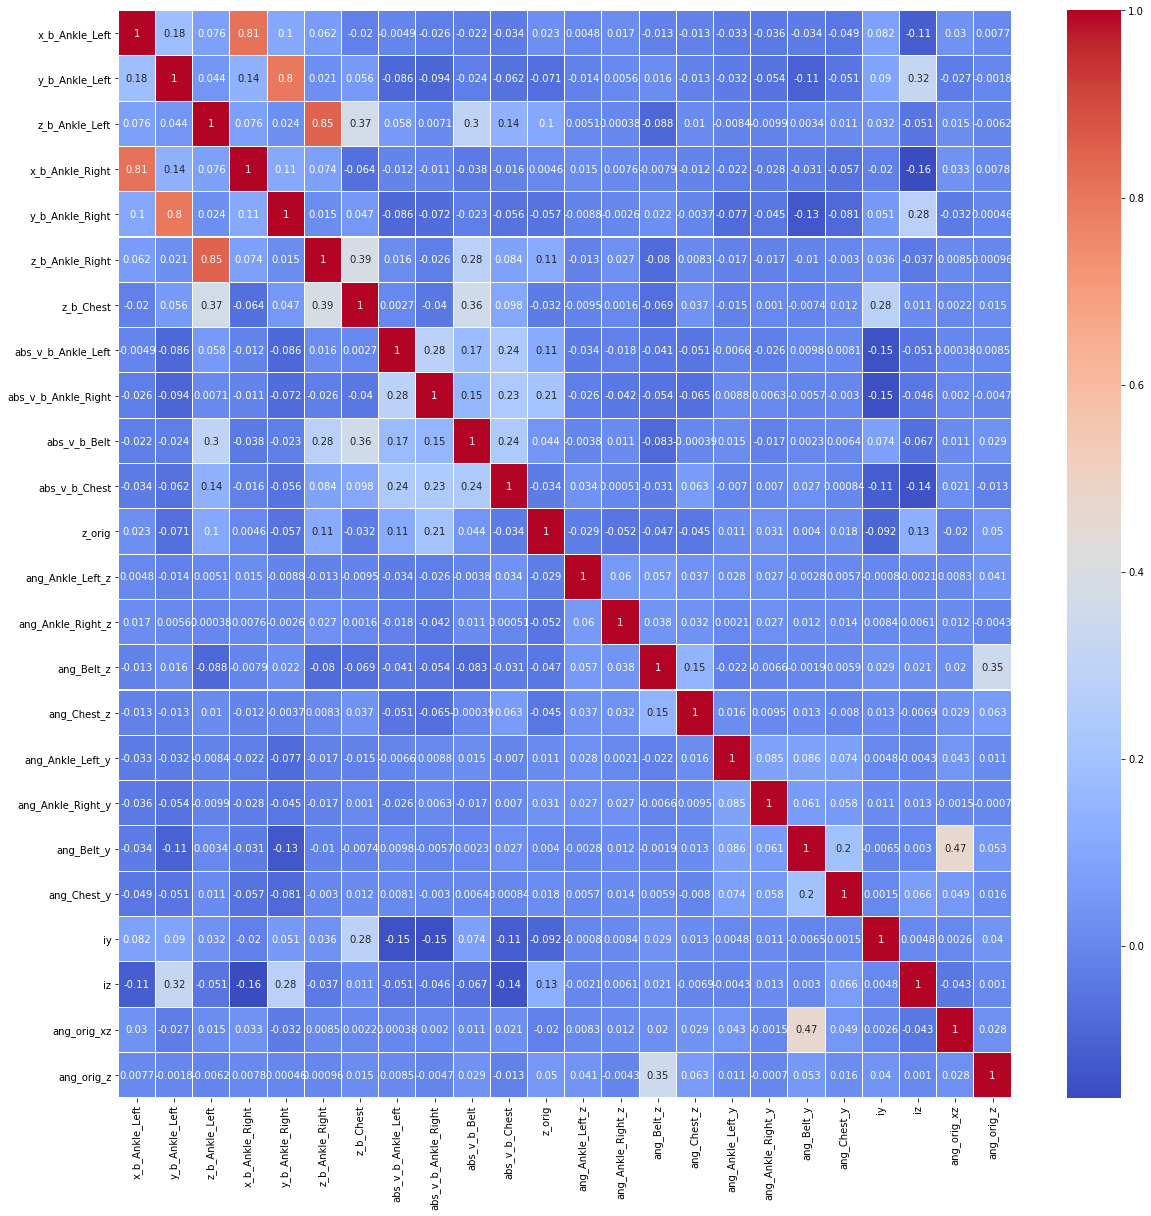

In [42]:
# Plotting the heatmap for correlating features
plt.subplots(figsize=(20,20))
_ = sns.heatmap(BA.corr(), annot=True, linewidths=0.1, cmap='coolwarm')
plt.show()

In [43]:
# Creating dataframe for reference and body both and dropping common columns
RA_BA = pd.concat([RA.reset_index(drop=True), BA], axis=1)
RA_BA.drop(columns=['z_orig'], inplace=True)
RA_BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   z_Ankle_Left                     5225 non-null   float64
 1   z_Ankle_Right                    5225 non-null   float64
 2   z_Belt                           5225 non-null   float64
 3   z_Chest                          5225 non-null   float64
 4   vz_Ankle_Left                    5225 non-null   float64
 5   vz_Ankle_Right                   5225 non-null   float64
 6   vz_Belt                          5225 non-null   float64
 7   vz_Chest                         5225 non-null   float64
 8   abs_v_Ankle_Left                 5225 non-null   float64
 9   abs_v_Ankle_Right                5225 non-null   float64
 10  abs_v_Belt                       5225 non-null   float64
 11  abs_v_Chest                      5225 non-null   float64
 12  abs_dist_Ankle_Left_

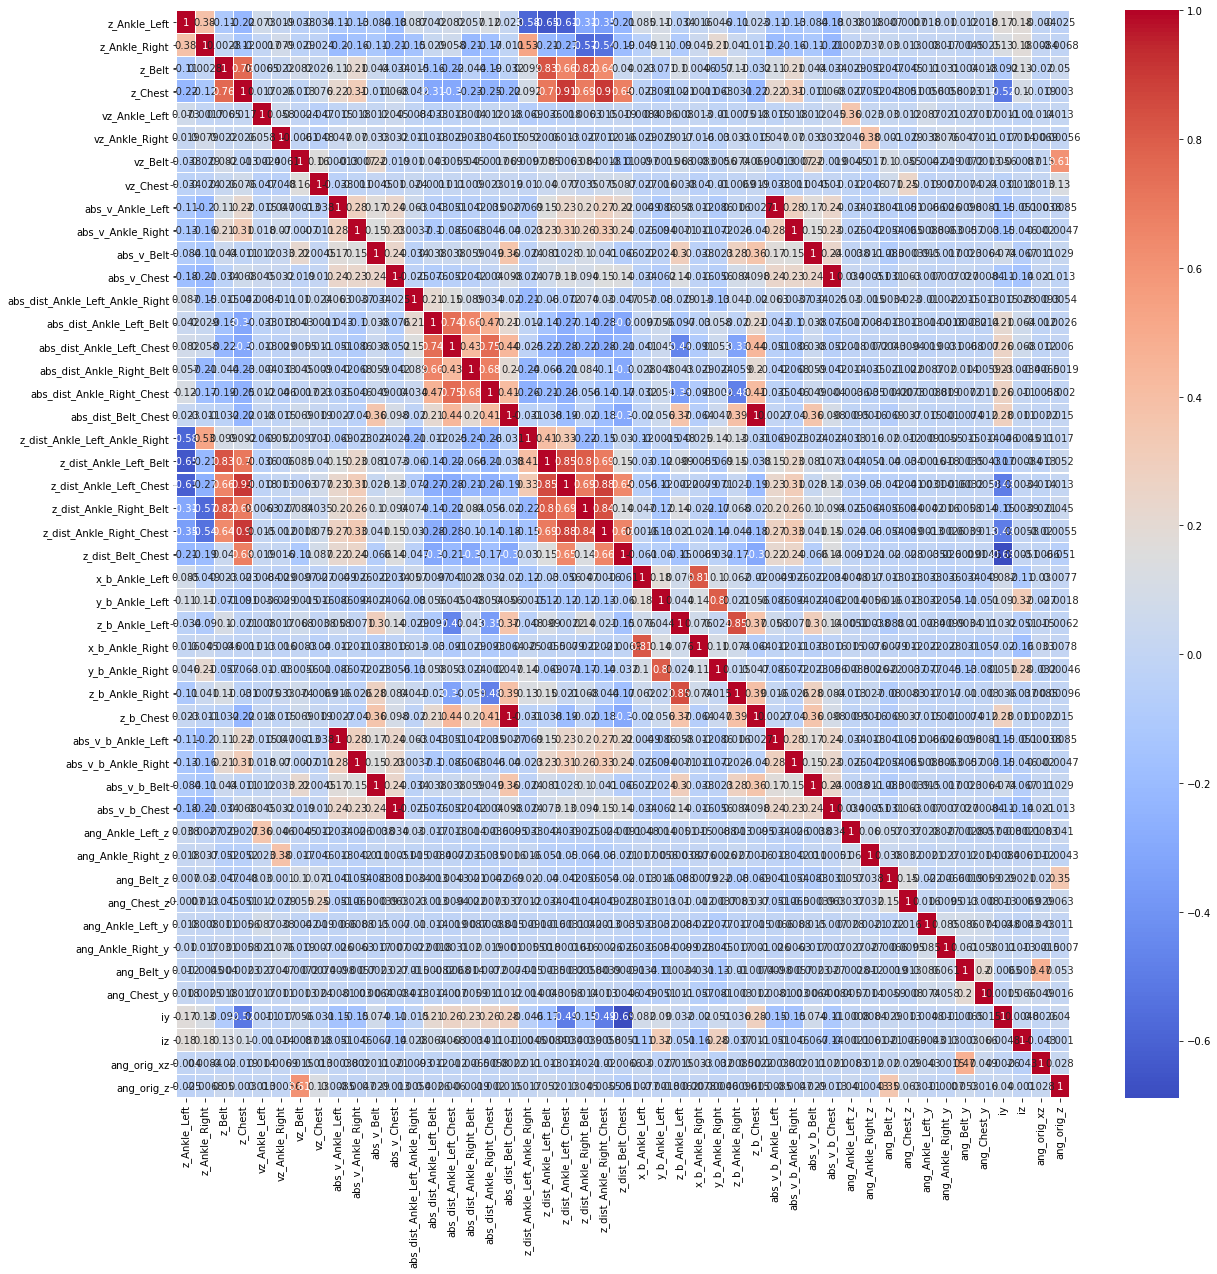

In [44]:
# Plotting the heatmap for correlating features
plt.subplots(figsize=(20,20))
_ = sns.heatmap(RA_BA.corr(), annot=True, linewidths=0.1, cmap='coolwarm')
plt.show()

In [45]:
# Dropping correlated features
RA_BA.drop(columns=['abs_v_b_Ankle_Left', 'abs_v_b_Ankle_Right', 'abs_v_b_Belt', 'abs_v_b_Chest', 'z_b_Chest'], inplace=True)
RA_BA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   z_Ankle_Left                     5225 non-null   float64
 1   z_Ankle_Right                    5225 non-null   float64
 2   z_Belt                           5225 non-null   float64
 3   z_Chest                          5225 non-null   float64
 4   vz_Ankle_Left                    5225 non-null   float64
 5   vz_Ankle_Right                   5225 non-null   float64
 6   vz_Belt                          5225 non-null   float64
 7   vz_Chest                         5225 non-null   float64
 8   abs_v_Ankle_Left                 5225 non-null   float64
 9   abs_v_Ankle_Right                5225 non-null   float64
 10  abs_v_Belt                       5225 non-null   float64
 11  abs_v_Chest                      5225 non-null   float64
 12  abs_dist_Ankle_Left_

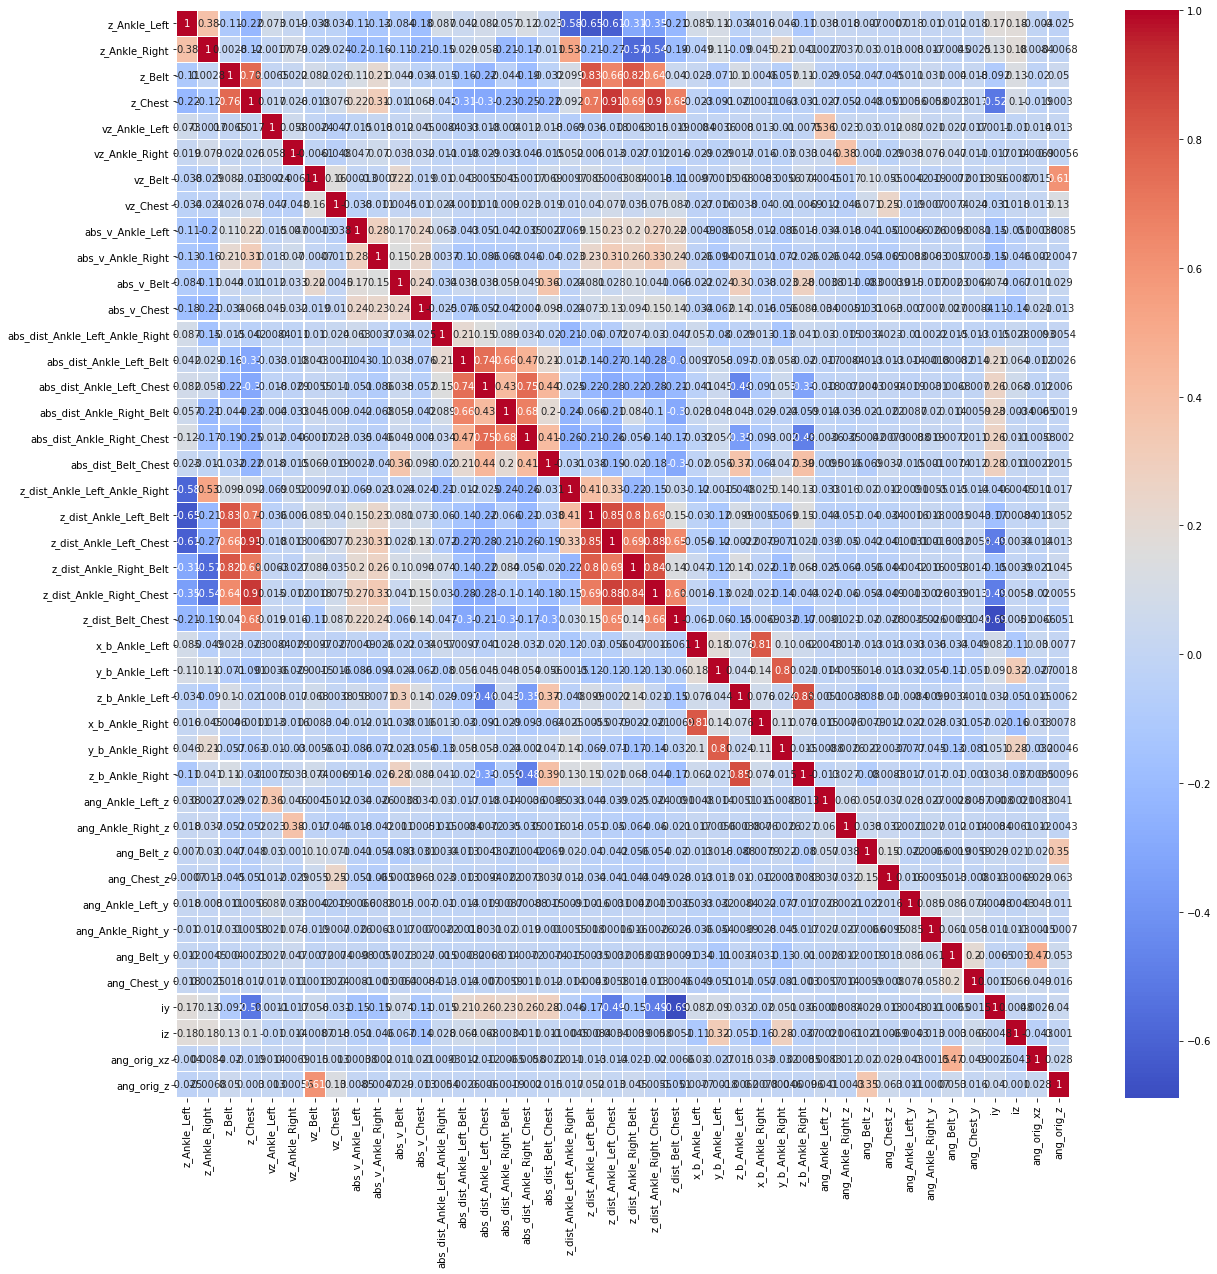

In [46]:
# Plotting the heatmap for correlating features
plt.subplots(figsize=(20,20))
_ = sns.heatmap(RA_BA.corr(), annot=True, linewidths=0.1, cmap='coolwarm')
plt.show()

In [47]:
# Defining Angle attributes between upper torso and lower torso considering both left and righ angles
ut_x, ut_y, ut_z = (df['x_Chest']-df['x_Belt']), (df['y_Chest']-df['y_Belt']), (df['z_Chest']-df['z_Belt'])
lt_r_x, lt_r_y, lt_r_z = (df['x_Ankle_Right']-df['x_Belt']), (df['y_Ankle_Right']-df['z_Belt']), (df['z_Ankle_Right']-df['z_Belt'])
lt_l_x, lt_l_y, lt_l_z = (df['x_Ankle_Left']-df['x_Belt']), (df['y_Ankle_Left']-df['z_Belt']), (df['z_Ankle_Left']-df['z_Belt'])

mod_ut = np.sqrt(ut_x**2+ut_y**2+ut_z**2)
mod_lt_r = np.sqrt(lt_r_x**2+lt_r_y**2+lt_r_z**2)
mod_lt_l = np.sqrt(lt_l_x**2+lt_l_y**2+lt_l_z**2)
ang_r = (ut_x.multiply(lt_r_x, axis=0)+ut_y.multiply(lt_r_y, axis=0)+ut_z.multiply(lt_r_z, axis=0)).divide(mod_ut, axis=0).divide(mod_lt_r, axis=0)
ang_l = (ut_x.multiply(lt_l_x, axis=0)+ut_y.multiply(lt_l_y, axis=0)+ut_z.multiply(lt_l_z, axis=0)).divide(mod_ut, axis=0).divide(mod_lt_l, axis=0)

AA = pd.DataFrame({'angle_left':ang_l, 'angle_right':ang_r})
AA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5225 entries, 2009-05-27 14:03:25 to 2009-05-27 11:50:41
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   angle_left   5225 non-null   float64
 1   angle_right  5225 non-null   float64
dtypes: float64(2)
memory usage: 122.5 KB


In [48]:
# Adding angle attributes with other attributes
RA_AA = pd.concat([RA, AA], axis=1)
RA_AA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5225 entries, 2009-05-27 14:03:25 to 2009-05-27 11:50:41
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   z_Ankle_Left                     5225 non-null   float64
 1   z_Ankle_Right                    5225 non-null   float64
 2   z_Belt                           5225 non-null   float64
 3   z_Chest                          5225 non-null   float64
 4   vz_Ankle_Left                    5225 non-null   float64
 5   vz_Ankle_Right                   5225 non-null   float64
 6   vz_Belt                          5225 non-null   float64
 7   vz_Chest                         5225 non-null   float64
 8   abs_v_Ankle_Left                 5225 non-null   float64
 9   abs_v_Ankle_Right                5225 non-null   float64
 10  abs_v_Belt                       5225 non-null   float64
 11  abs_v_Chest                      5225 non-null

In [49]:
BA_AA = pd.concat([BA, AA.reset_index(drop=True)], axis=1)
BA_AA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x_b_Ankle_Left       5225 non-null   float64
 1   y_b_Ankle_Left       5225 non-null   float64
 2   z_b_Ankle_Left       5225 non-null   float64
 3   x_b_Ankle_Right      5225 non-null   float64
 4   y_b_Ankle_Right      5225 non-null   float64
 5   z_b_Ankle_Right      5225 non-null   float64
 6   z_b_Chest            5225 non-null   float64
 7   abs_v_b_Ankle_Left   5225 non-null   float64
 8   abs_v_b_Ankle_Right  5225 non-null   float64
 9   abs_v_b_Belt         5225 non-null   float64
 10  abs_v_b_Chest        5225 non-null   float64
 11  z_orig               5225 non-null   float64
 12  ang_Ankle_Left_z     5225 non-null   float64
 13  ang_Ankle_Right_z    5225 non-null   float64
 14  ang_Belt_z           5225 non-null   float64
 15  ang_Chest_z          5225 non-null   f

In [50]:
RA_BA_AA = pd.concat([RA_BA, AA.reset_index(drop=True)], axis=1)
RA_BA_AA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   z_Ankle_Left                     5225 non-null   float64
 1   z_Ankle_Right                    5225 non-null   float64
 2   z_Belt                           5225 non-null   float64
 3   z_Chest                          5225 non-null   float64
 4   vz_Ankle_Left                    5225 non-null   float64
 5   vz_Ankle_Right                   5225 non-null   float64
 6   vz_Belt                          5225 non-null   float64
 7   vz_Chest                         5225 non-null   float64
 8   abs_v_Ankle_Left                 5225 non-null   float64
 9   abs_v_Ankle_Right                5225 non-null   float64
 10  abs_v_Belt                       5225 non-null   float64
 11  abs_v_Chest                      5225 non-null   float64
 12  abs_dist_Ankle_Left_

#### Now we have 6 feature attributes
1. Reference Attributes (RA)
2. Body Attributes (BA)
3. Angle attributes (AA)
4. Reference+Body (RA_BA)
5. Reference+Angle (RA_AA)
6. Body+Angle (BA_AA)
7. Reference+Body+Angle(RA_BA_AA)

#### Let us now scale all the features using standard scalar and split the data to training and test data

#### In this project since there are imbalance classes we will apply one more preprocessing technique i.e. Synthetic Minority Oversampling Technique

#### The important point to be noticed in preprocessing is that all the preprocessing techniques will be applied only on training data and test data will be like the unseen data for prediction only

In literatures they have done 10-fold Cross Validation and reported the accuracies but in this project 10-fold CV will be applied only to training data and further accuracies will be reported by predicting the test data.

In [51]:
# Import Standard Scaler and train test split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [52]:
# Before scaling and splitting lets define our output variable i.e. y which is activity column of dataframe
y = df['activity']
print(y.describe())
y.head()

count      5225
unique       11
top       lying
freq       1743
Name: activity, dtype: object


date
2009-05-27 14:03:25         walking
2009-05-27 14:03:26         walking
2009-05-27 14:03:27         walking
2009-05-27 14:03:28         walking
2009-05-27 14:03:29    sitting down
Name: activity, dtype: object

In [53]:
# 1. Preprocessing the reference attributes
X_train_RA, X_test_RA, y_train_RA, y_test_RA = train_test_split(RA, y, test_size=0.25, stratify=y, random_state=42)
scaler_RA = StandardScaler()
X_train_RA_scaled = scaler_RA.fit_transform(X_train_RA)
X_train_RA_scaled_smote, y_RA_smote = SMOTE().fit_resample(X_train_RA_scaled, y_train_RA)
print(y_RA_smote.value_counts())
print(X_train_RA_scaled_smote.shape)

sitting on the ground                     1307
walking                                   1307
standing up from sitting                  1307
on all fours                              1307
lying down                                1307
standing up from lying                    1307
lying                                     1307
sitting                                   1307
standing up from sitting on the ground    1307
sitting down                              1307
falling                                   1307
Name: activity, dtype: int64
(14377, 24)


In [54]:
# 2. Preprocessing the body attributes
X_train_BA, X_test_BA, y_train_BA, y_test_BA = train_test_split(BA, y, test_size=0.25, stratify=y, random_state=42)
scaler_BA = StandardScaler()
X_train_BA_scaled = scaler_BA.fit_transform(X_train_BA)
X_train_BA_scaled_smote, y_BA_smote = SMOTE().fit_resample(X_train_BA_scaled, y_train_BA)
print(y_BA_smote.value_counts())
print(X_train_BA_scaled_smote.shape)

sitting on the ground                     1307
walking                                   1307
standing up from sitting                  1307
on all fours                              1307
lying down                                1307
standing up from lying                    1307
lying                                     1307
sitting                                   1307
standing up from sitting on the ground    1307
sitting down                              1307
falling                                   1307
Name: activity, dtype: int64
(14377, 24)


In [55]:
# 3. Preprocessing the angle attributes
X_train_AA, X_test_AA, y_train_AA, y_test_AA = train_test_split(AA, y, test_size=0.25, stratify=y, random_state=42)
scaler_AA = StandardScaler()
X_train_AA_scaled = scaler_AA.fit_transform(X_train_AA)
X_train_AA_scaled_smote, y_AA_smote = SMOTE().fit_resample(X_train_AA_scaled, y_train_AA)
print(y_AA_smote.value_counts())
print(X_train_AA_scaled_smote.shape)

sitting on the ground                     1307
walking                                   1307
standing up from sitting                  1307
on all fours                              1307
lying down                                1307
standing up from lying                    1307
lying                                     1307
sitting                                   1307
standing up from sitting on the ground    1307
sitting down                              1307
falling                                   1307
Name: activity, dtype: int64
(14377, 2)


In [56]:
# 4. Preprocessing the reference+body attributes
X_train_RA_BA, X_test_RA_BA, y_train_RA_BA, y_test_RA_BA = train_test_split(RA_BA, y, test_size=0.25, stratify=y, random_state=42)
scaler_RA_BA = StandardScaler()
X_train_RA_BA_scaled = scaler_RA_BA.fit_transform(X_train_RA_BA)
X_train_RA_BA_scaled_smote, y_RA_BA_smote = SMOTE().fit_resample(X_train_RA_BA_scaled, y_train_RA_BA)
print(y_RA_BA_smote.value_counts())
print(X_train_RA_BA_scaled_smote.shape)

sitting on the ground                     1307
walking                                   1307
standing up from sitting                  1307
on all fours                              1307
lying down                                1307
standing up from lying                    1307
lying                                     1307
sitting                                   1307
standing up from sitting on the ground    1307
sitting down                              1307
falling                                   1307
Name: activity, dtype: int64
(14377, 42)


In [57]:
# 5. Preprocessing the reference+angle attributes
X_train_RA_AA, X_test_RA_AA, y_train_RA_AA, y_test_RA_AA = train_test_split(RA_AA, y, test_size=0.25, stratify=y, random_state=42)
scaler_RA_AA = StandardScaler()
X_train_RA_AA_scaled = scaler_RA_AA.fit_transform(X_train_RA_AA)
X_train_RA_AA_scaled_smote, y_RA_AA_smote = SMOTE().fit_resample(X_train_RA_AA_scaled, y_train_RA_AA)
print(y_RA_AA_smote.value_counts())
print(X_train_RA_AA_scaled_smote.shape)

sitting on the ground                     1307
walking                                   1307
standing up from sitting                  1307
on all fours                              1307
lying down                                1307
standing up from lying                    1307
lying                                     1307
sitting                                   1307
standing up from sitting on the ground    1307
sitting down                              1307
falling                                   1307
Name: activity, dtype: int64
(14377, 26)


In [58]:
# 6. Preprocessing the body+angle attributes
X_train_BA_AA, X_test_BA_AA, y_train_BA_AA, y_test_BA_AA = train_test_split(BA_AA, y, test_size=0.25, stratify=y, random_state=42)
scaler_BA_AA = StandardScaler()
X_train_BA_AA_scaled = scaler_BA_AA.fit_transform(X_train_BA_AA)
X_train_BA_AA_scaled_smote, y_BA_AA_smote = SMOTE().fit_resample(X_train_BA_AA_scaled, y_train_BA_AA)
print(y_BA_AA_smote.value_counts())
print(X_train_BA_AA_scaled_smote.shape)

sitting on the ground                     1307
walking                                   1307
standing up from sitting                  1307
on all fours                              1307
lying down                                1307
standing up from lying                    1307
lying                                     1307
sitting                                   1307
standing up from sitting on the ground    1307
sitting down                              1307
falling                                   1307
Name: activity, dtype: int64
(14377, 26)


In [59]:
# 7. Preprocessing the reference+body+angle attributes
X_train_RA_BA_AA, X_test_RA_BA_AA, y_train_RA_BA_AA, y_test_RA_BA_AA = train_test_split(RA_BA_AA, y, test_size=0.25, stratify=y, random_state=42)
scaler_RA_BA_AA = StandardScaler()
X_train_RA_BA_AA_scaled = scaler_RA_BA_AA.fit_transform(X_train_RA_BA_AA)
X_train_RA_BA_AA_scaled_smote, y_RA_BA_AA_smote = SMOTE().fit_resample(X_train_RA_BA_AA_scaled, y_train_RA_BA_AA)
print(y_RA_BA_AA_smote.value_counts())
print(X_train_RA_BA_AA_scaled_smote.shape)

sitting on the ground                     1307
walking                                   1307
standing up from sitting                  1307
on all fours                              1307
lying down                                1307
standing up from lying                    1307
lying                                     1307
sitting                                   1307
standing up from sitting on the ground    1307
sitting down                              1307
falling                                   1307
Name: activity, dtype: int64
(14377, 44)


#### It is pertinent to mention in the conclusion of this preprocessing exercise that the same procedure will be followed for the clean data (i.e. data smoothened with Kalman Filter)

# Modeling

## 1. Decision Tree Classifier Model

Decision Tree Classifier on Reference Attributes
Cross Validation Accuracy: 0.9011642436191145
Best parameter from Cross Validation: {'criterion': 'entropy', 'max_depth': 18}
Accuracy: 0.7214996174445295
Precision for fall: 0.13953488372093023
Recall for fall: 0.3
F1-score for fall: 0.1904761904761905


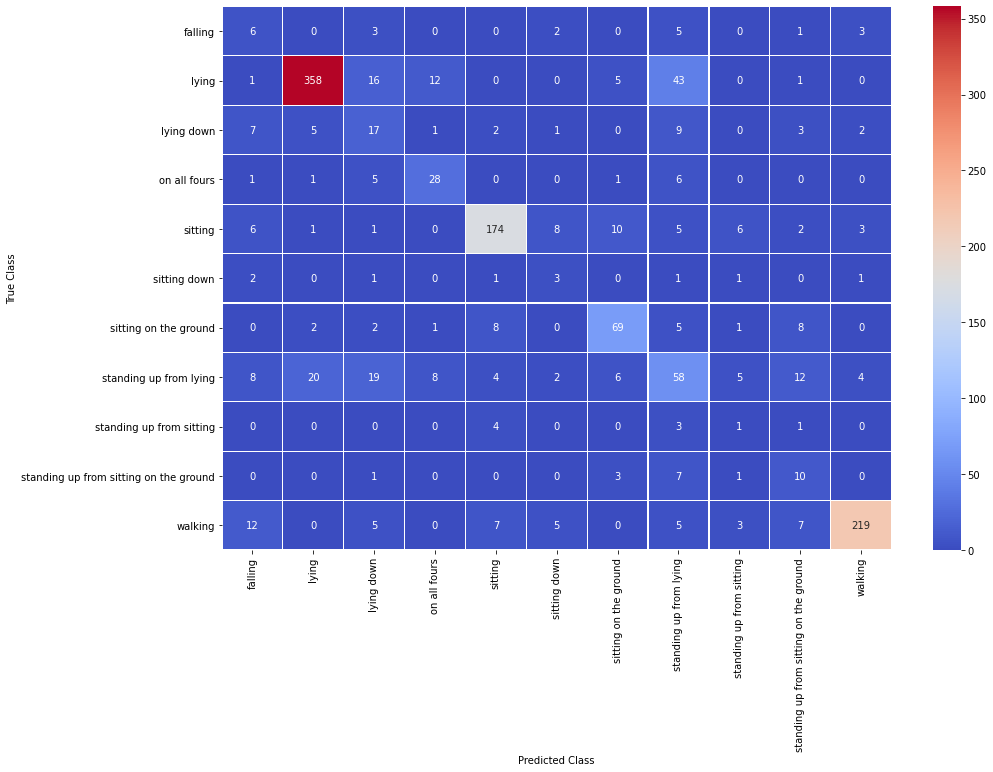

In [71]:
# 1.1. Decision Tree - Referenece Attributes
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
criterion = ['gini', 'entropy']
max_depth = list(np.arange(2,41,2))
max_depth.append(None)
param_grid = {'criterion':criterion, 'max_depth':max_depth}
dtc_RA = DecisionTreeClassifier(random_state=42)
dtc_RA_cv = GridSearchCV(dtc_RA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
dtc_RA_cv.fit(X_train_RA_scaled_smote, y_RA_smote)
print('Decision Tree Classifier on Reference Attributes')
print('Cross Validation Accuracy:', dtc_RA_cv.best_score_)
print('Best parameter from Cross Validation:', dtc_RA_cv.best_params_)
X_test_RA_scaled = scaler_RA.transform(X_test_RA)
y_pred_RA_dtc = dtc_RA_cv.predict(X_test_RA_scaled)
print('Accuracy:', accuracy_score(y_test_RA, y_pred_RA_dtc))
print('Precision for fall:', precision_score(y_test_RA, y_pred_RA_dtc, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA, y_pred_RA_dtc, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA, y_pred_RA_dtc, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA, y_pred_RA_dtc, labels=dtc_RA_cv.classes_), 
            annot=True, fmt='d', xticklabels=dtc_RA_cv.classes_, yticklabels=dtc_RA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Decision Tree Classifier on Reference Attributes
Cross Validation Accuracy: 0.8724381365520619
Best parameter from Cross Validation: {'criterion': 'entropy', 'max_depth': 16}
Accuracy: 0.6526396327467483
Precision for fall: 0.28
Recall for fall: 0.35
F1-score for fall: 0.3111111111111111


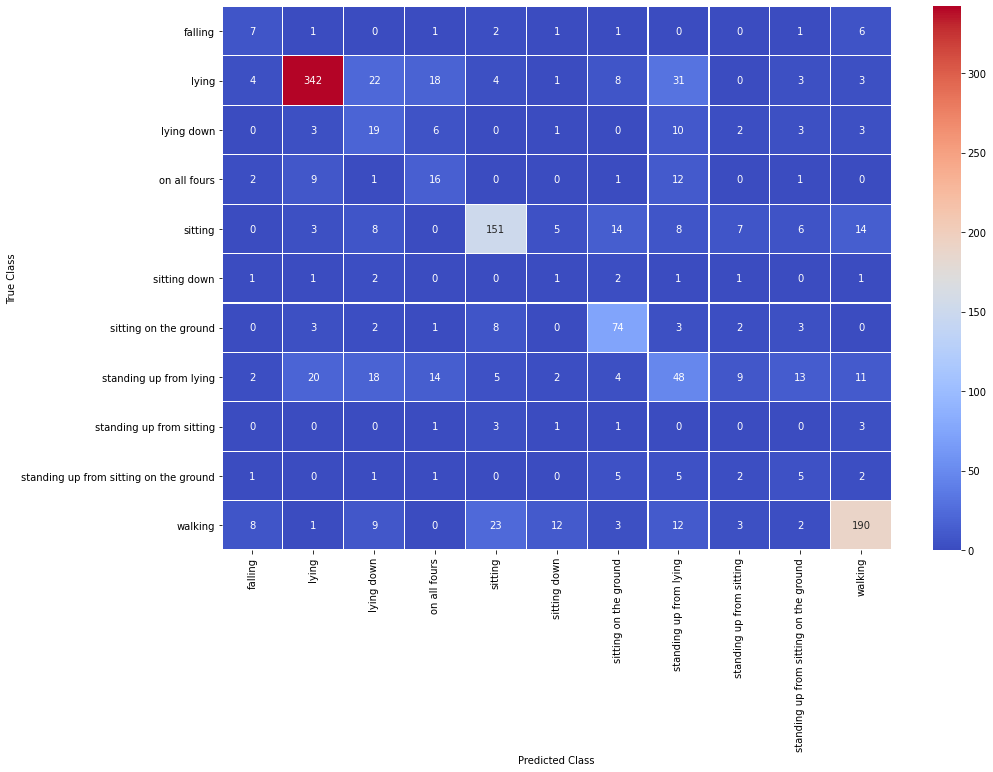

In [72]:
# 1.2. Decision Tree - Body Attributes
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
criterion = ['gini', 'entropy']
max_depth = list(np.arange(2,41,2))
max_depth.append(None)
param_grid = {'criterion':criterion, 'max_depth':max_depth}
dtc_BA = DecisionTreeClassifier(random_state=42)
dtc_BA_cv = GridSearchCV(dtc_BA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
dtc_BA_cv.fit(X_train_BA_scaled_smote, y_BA_smote)
print('Decision Tree Classifier on Body Attributes')
print('Cross Validation Accuracy:', dtc_BA_cv.best_score_)
print('Best parameter from Cross Validation:', dtc_BA_cv.best_params_)
X_test_BA_scaled = scaler_BA.transform(X_test_BA)
y_pred_BA_dtc = dtc_BA_cv.predict(X_test_BA_scaled)
print('Accuracy:', accuracy_score(y_test_BA, y_pred_BA_dtc))
print('Precision for fall:', precision_score(y_test_BA, y_pred_BA_dtc, average=None)[0])
print('Recall for fall:', recall_score(y_test_BA, y_pred_BA_dtc, average=None)[0])
print('F1-score for fall:', f1_score(y_test_BA, y_pred_BA_dtc, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_BA, y_pred_BA_dtc, labels=dtc_BA_cv.classes_), 
            annot=True, fmt='d', xticklabels=dtc_BA_cv.classes_, yticklabels=dtc_BA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Decision Tree Classifier on Angle Attributes
Cross Validation Accuracy: 0.43674156966249617
Best parameter from Cross Validation: {'criterion': 'entropy', 'max_depth': 20}
Accuracy: 0.15072685539403213
Precision for fall: 0.021505376344086023
Recall for fall: 0.1
F1-score for fall: 0.035398230088495575


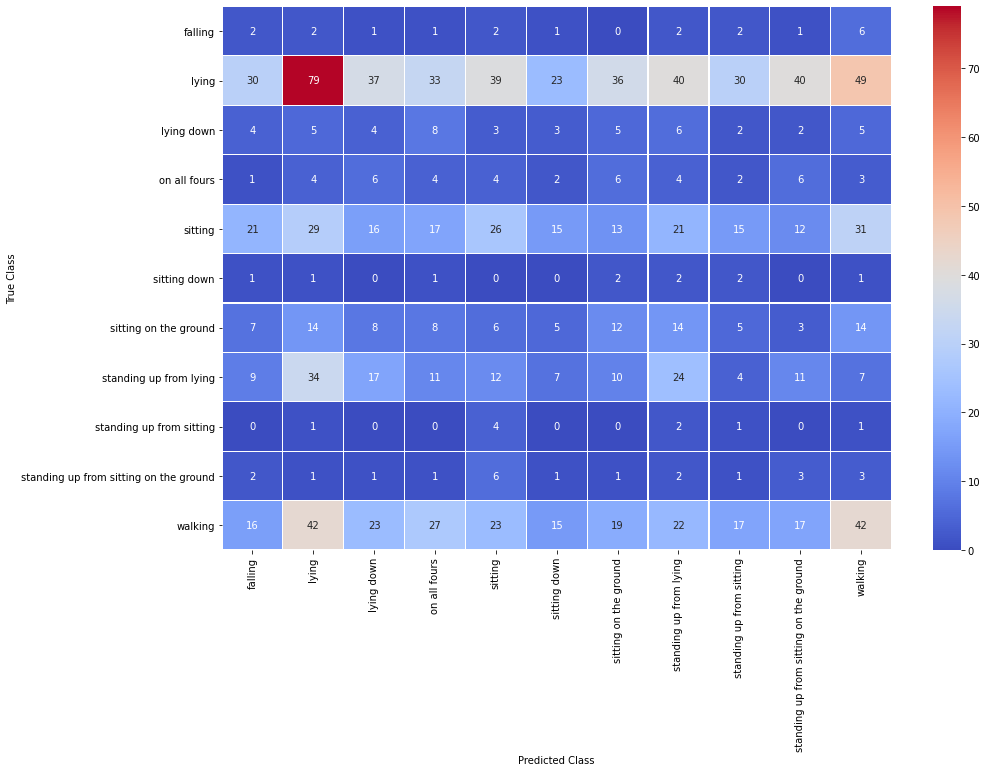

In [73]:
# 1.3. Decision Tree - Angle Attributes
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
criterion = ['gini', 'entropy']
max_depth = list(np.arange(2,41,2))
max_depth.append(None)
param_grid = {'criterion':criterion, 'max_depth':max_depth}
dtc_AA = DecisionTreeClassifier(random_state=42)
dtc_AA_cv = GridSearchCV(dtc_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
dtc_AA_cv.fit(X_train_AA_scaled_smote, y_AA_smote)
print('Decision Tree Classifier on Angle Attributes')
print('Cross Validation Accuracy:', dtc_AA_cv.best_score_)
print('Best parameter from Cross Validation:', dtc_AA_cv.best_params_)
X_test_AA_scaled = scaler_AA.transform(X_test_AA)
y_pred_AA_dtc = dtc_AA_cv.predict(X_test_AA_scaled)
print('Accuracy:', accuracy_score(y_test_AA, y_pred_AA_dtc))
print('Precision for fall:', precision_score(y_test_AA, y_pred_AA_dtc, average=None)[0])
print('Recall for fall:', recall_score(y_test_AA, y_pred_AA_dtc, average=None)[0])
print('F1-score for fall:', f1_score(y_test_AA, y_pred_AA_dtc, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_AA, y_pred_AA_dtc, labels=dtc_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=dtc_AA_cv.classes_, yticklabels=dtc_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Decision Tree Classifier on Reference and Body Attributes
Cross Validation Accuracy: 0.9081887586466552
Best parameter from Cross Validation: {'criterion': 'entropy', 'max_depth': 16}
Accuracy: 0.7368018362662586
Precision for fall: 0.2619047619047619
Recall for fall: 0.55
F1-score for fall: 0.3548387096774194


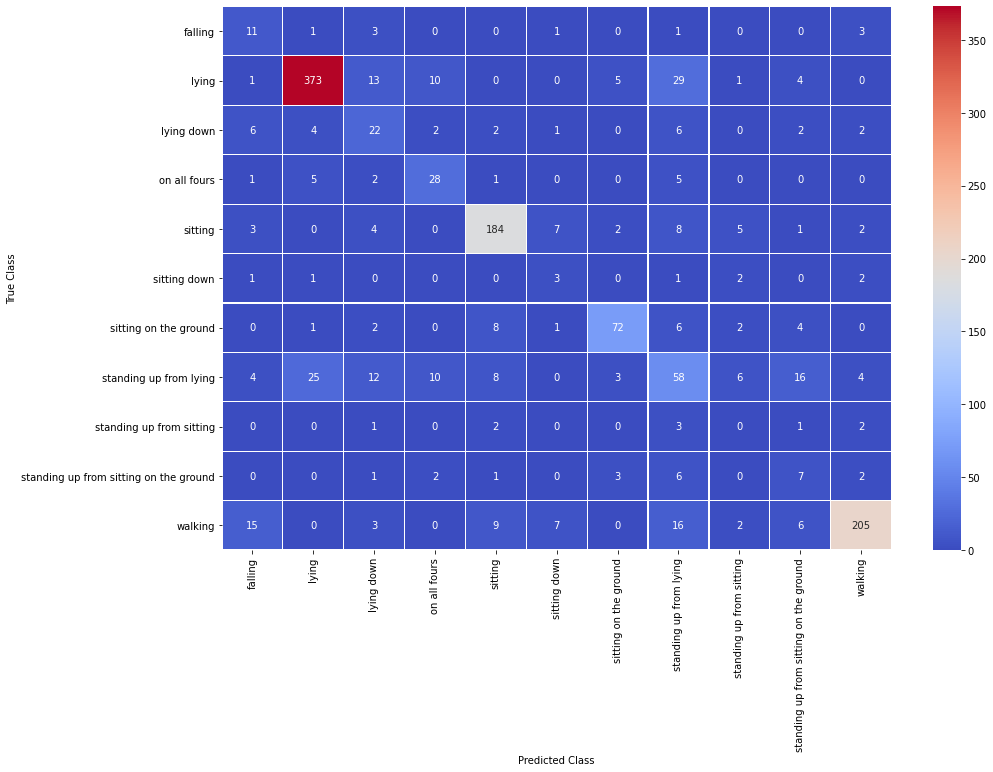

In [74]:
# 1.4. Decision Tree - Reference+Body Attributes
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
criterion = ['gini', 'entropy']
max_depth = list(np.arange(2,41,2))
max_depth.append(None)
param_grid = {'criterion':criterion, 'max_depth':max_depth}
dtc_RA_BA = DecisionTreeClassifier(random_state=42)
dtc_RA_BA_cv = GridSearchCV(dtc_RA_BA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
dtc_RA_BA_cv.fit(X_train_RA_BA_scaled_smote, y_RA_BA_smote)
print('Decision Tree Classifier on Reference and Body Attributes')
print('Cross Validation Accuracy:', dtc_RA_BA_cv.best_score_)
print('Best parameter from Cross Validation:', dtc_RA_BA_cv.best_params_)
X_test_RA_BA_scaled = scaler_RA_BA.transform(X_test_RA_BA)
y_pred_RA_BA_dtc = dtc_RA_BA_cv.predict(X_test_RA_BA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_BA, y_pred_RA_BA_dtc))
print('Precision for fall:', precision_score(y_test_RA_BA, y_pred_RA_BA_dtc, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_BA, y_pred_RA_BA_dtc, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_BA, y_pred_RA_BA_dtc, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_BA, y_pred_RA_BA_dtc, labels=dtc_RA_BA_cv.classes_), 
            annot=True, fmt='d', xticklabels=dtc_RA_BA_cv.classes_, yticklabels=dtc_RA_BA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Decision Tree Classifier on Reference and Angle Attributes
Cross Validation Accuracy: 0.8984517079412274
Best parameter from Cross Validation: {'criterion': 'entropy', 'max_depth': 20}
Accuracy: 0.6931905126243305
Precision for fall: 0.08108108108108109
Recall for fall: 0.15
F1-score for fall: 0.10526315789473685


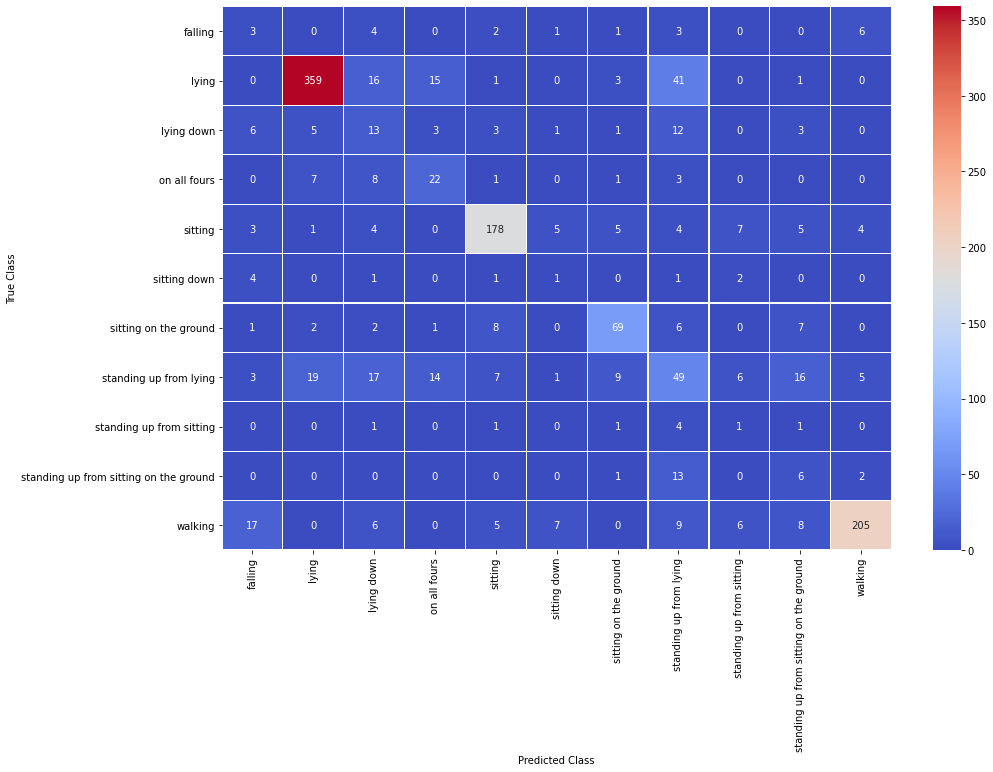

In [75]:
# 1.5. Decision Tree - Reference+Angle Attributes
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
criterion = ['gini', 'entropy']
max_depth = list(np.arange(2,41,2))
max_depth.append(None)
param_grid = {'criterion':criterion, 'max_depth':max_depth}
dtc_RA_AA = DecisionTreeClassifier(random_state=42)
dtc_RA_AA_cv = GridSearchCV(dtc_RA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
dtc_RA_AA_cv.fit(X_train_RA_AA_scaled_smote, y_RA_AA_smote)
print('Decision Tree Classifier on Reference and Angle Attributes')
print('Cross Validation Accuracy:', dtc_RA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', dtc_RA_AA_cv.best_params_)
X_test_RA_AA_scaled = scaler_RA_AA.transform(X_test_RA_AA)
y_pred_RA_AA_dtc = dtc_RA_AA_cv.predict(X_test_RA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_AA, y_pred_RA_AA_dtc))
print('Precision for fall:', precision_score(y_test_RA_AA, y_pred_RA_AA_dtc, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_AA, y_pred_RA_AA_dtc, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_AA, y_pred_RA_AA_dtc, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_AA, y_pred_RA_AA_dtc, labels=dtc_RA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=dtc_RA_AA_cv.classes_, yticklabels=dtc_RA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Decision Tree Classifier on Body and Angle Attributes
Cross Validation Accuracy: 0.8776538105290055
Best parameter from Cross Validation: {'criterion': 'entropy', 'max_depth': 22}
Accuracy: 0.65876052027544
Precision for fall: 0.2727272727272727
Recall for fall: 0.45
F1-score for fall: 0.339622641509434


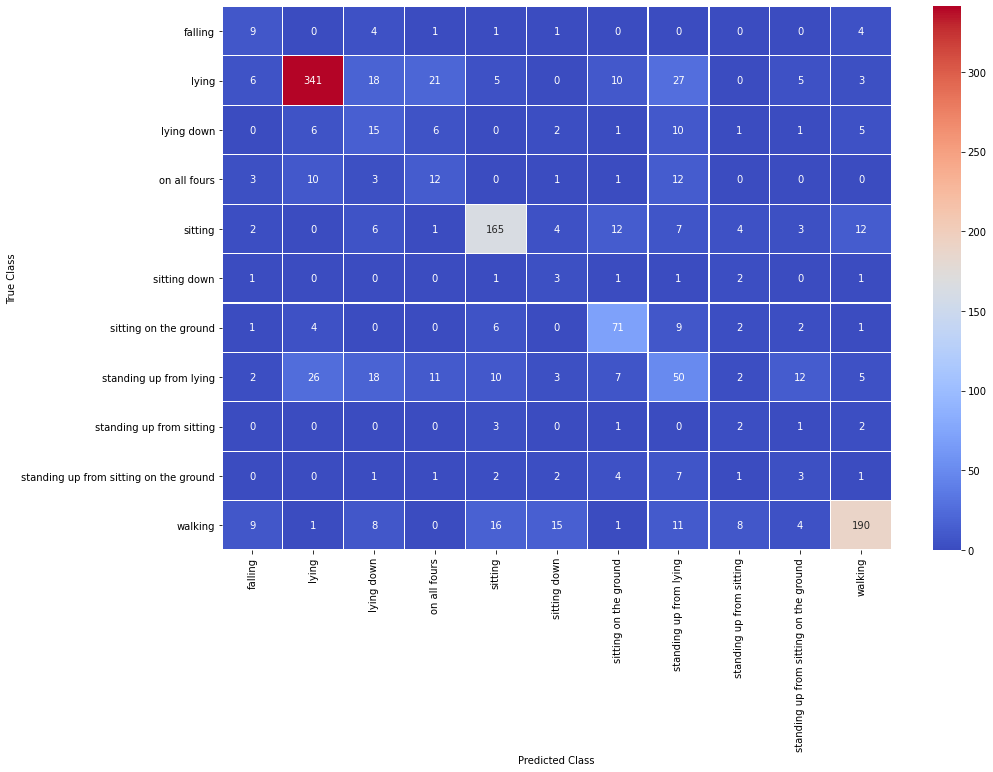

In [76]:
# 1.6. Decision Tree - Body+Angle Attributes
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
criterion = ['gini', 'entropy']
max_depth = list(np.arange(2,41,2))
max_depth.append(None)
param_grid = {'criterion':criterion, 'max_depth':max_depth}
dtc_BA_AA = DecisionTreeClassifier(random_state=42)
dtc_BA_AA_cv = GridSearchCV(dtc_BA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
dtc_BA_AA_cv.fit(X_train_BA_AA_scaled_smote, y_BA_AA_smote)
print('Decision Tree Classifier on Body and Angle Attributes')
print('Cross Validation Accuracy:', dtc_BA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', dtc_BA_AA_cv.best_params_)
X_test_BA_AA_scaled = scaler_BA_AA.transform(X_test_BA_AA)
y_pred_BA_AA_dtc = dtc_BA_AA_cv.predict(X_test_BA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_BA_AA, y_pred_BA_AA_dtc))
print('Precision for fall:', precision_score(y_test_BA_AA, y_pred_BA_AA_dtc, average=None)[0])
print('Recall for fall:', recall_score(y_test_BA_AA, y_pred_BA_AA_dtc, average=None)[0])
print('F1-score for fall:', f1_score(y_test_BA_AA, y_pred_BA_AA_dtc, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_BA_AA, y_pred_BA_AA_dtc, labels=dtc_BA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=dtc_BA_AA_cv.classes_, yticklabels=dtc_BA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Decision Tree Classifier on All Attributes
Cross Validation Accuracy: 0.903459242762555
Best parameter from Cross Validation: {'criterion': 'entropy', 'max_depth': 16}
Accuracy: 0.7153787299158378
Precision for fall: 0.23333333333333334
Recall for fall: 0.35
F1-score for fall: 0.28


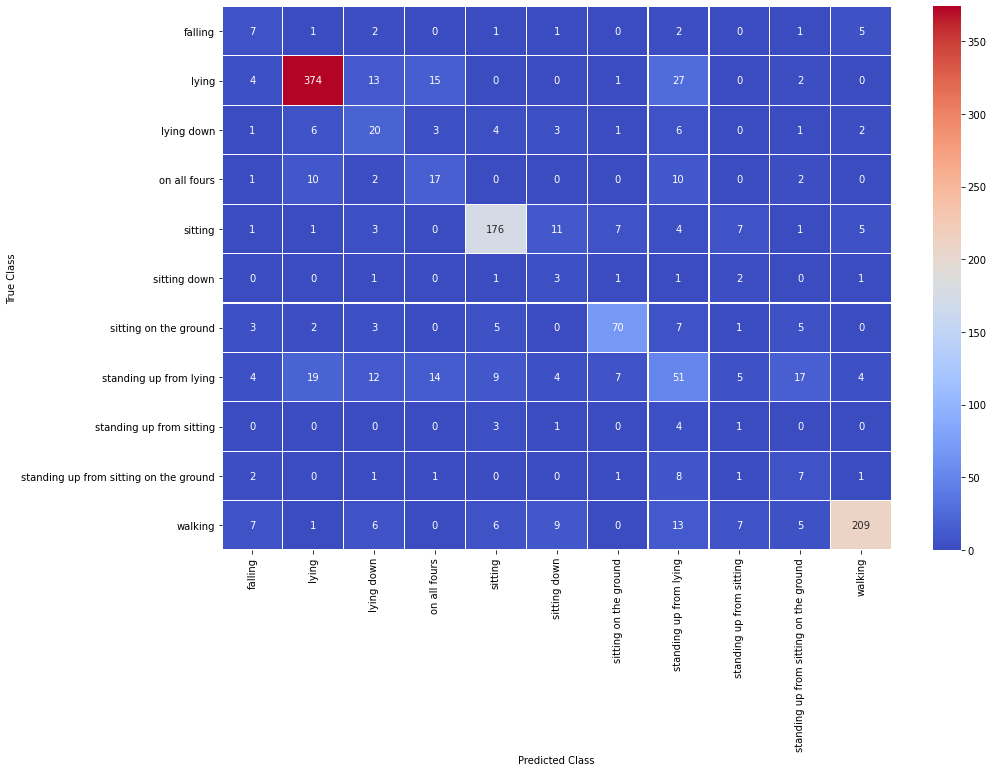

In [77]:
# 1.7. Decision Tree - All Attributes
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
criterion = ['gini', 'entropy']
max_depth = list(np.arange(2,41,2))
max_depth.append(None)
param_grid = {'criterion':criterion, 'max_depth':max_depth}
dtc_RA_BA_AA = DecisionTreeClassifier(random_state=42)
dtc_RA_BA_AA_cv = GridSearchCV(dtc_RA_BA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
dtc_RA_BA_AA_cv.fit(X_train_RA_BA_AA_scaled_smote, y_RA_BA_AA_smote)
print('Decision Tree Classifier on All Attributes')
print('Cross Validation Accuracy:', dtc_RA_BA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', dtc_RA_BA_AA_cv.best_params_)
X_test_RA_BA_AA_scaled = scaler_RA_BA_AA.transform(X_test_RA_BA_AA)
y_pred_RA_BA_AA_dtc = dtc_RA_BA_AA_cv.predict(X_test_RA_BA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_dtc))
print('Precision for fall:', precision_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_dtc, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_dtc, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_dtc, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_BA_AA, y_pred_RA_BA_AA_dtc, labels=dtc_RA_BA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=dtc_RA_BA_AA_cv.classes_, yticklabels=dtc_RA_BA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

## 2. K-Nearest Neighbor

K-Nearest Neighbors on Reference Attributes
Cross Validation Accuracy: 0.9778834362656708
Best parameter from Cross Validation: {'n_neighbors': 1}
Accuracy: 0.7628156082631982
Precision for fall: 0.2857142857142857
Recall for fall: 0.4
F1-score for fall: 0.3333333333333333


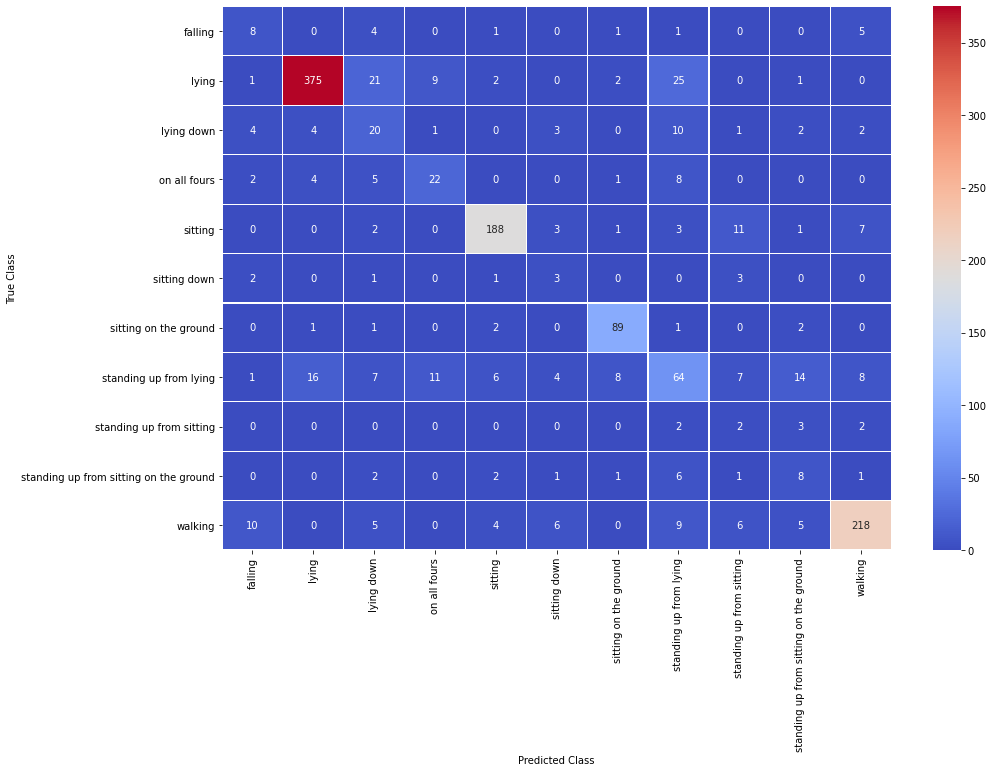

In [86]:
# 2.1. KNN - Referenece Attributes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_neighbors = list(np.arange(1,21,1))
param_grid = {'n_neighbors':n_neighbors}
knn_RA = KNeighborsClassifier()
knn_RA_cv = GridSearchCV(knn_RA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
knn_RA_cv.fit(X_train_RA_scaled_smote, y_RA_smote)
print('K-Nearest Neighbors on Reference Attributes')
print('Cross Validation Accuracy:', knn_RA_cv.best_score_)
print('Best parameter from Cross Validation:', knn_RA_cv.best_params_)
X_test_RA_scaled = scaler_RA.transform(X_test_RA)
y_pred_RA_knn = knn_RA_cv.predict(X_test_RA_scaled)
print('Accuracy:', accuracy_score(y_test_RA, y_pred_RA_knn))
print('Precision for fall:', precision_score(y_test_RA, y_pred_RA_knn, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA, y_pred_RA_knn, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA, y_pred_RA_knn, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA, y_pred_RA_knn, labels=knn_RA_cv.classes_), 
            annot=True, fmt='d', xticklabels=knn_RA_cv.classes_, yticklabels=knn_RA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

K-Nearest Neighbors on Body Attributes
Cross Validation Accuracy: 0.9616086577371533
Best parameter from Cross Validation: {'n_neighbors': 1}
Accuracy: 0.6281560826319816
Precision for fall: 0.22580645161290322
Recall for fall: 0.35
F1-score for fall: 0.2745098039215686


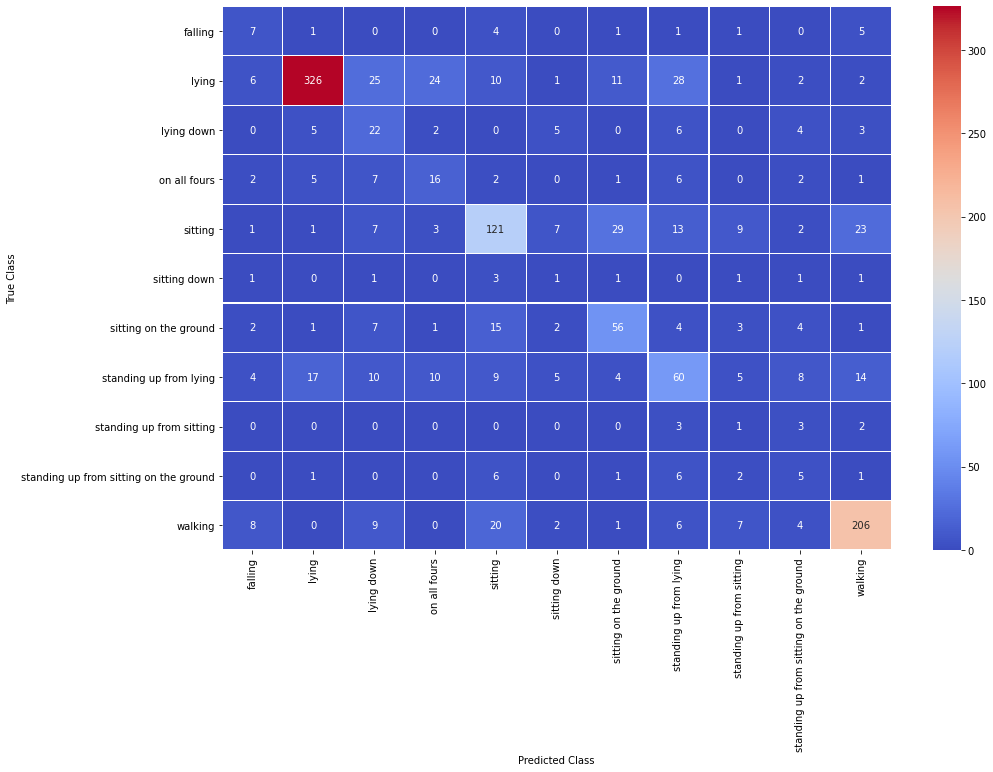

In [87]:
# 2.2. KNN - Body Attributes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_neighbors = list(np.arange(1,21,1))
param_grid = {'n_neighbors':n_neighbors}
knn_BA = KNeighborsClassifier()
knn_BA_cv = GridSearchCV(knn_BA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
knn_BA_cv.fit(X_train_BA_scaled_smote, y_BA_smote)
print('K-Nearest Neighbors on Body Attributes')
print('Cross Validation Accuracy:', knn_BA_cv.best_score_)
print('Best parameter from Cross Validation:', knn_BA_cv.best_params_)
X_test_BA_scaled = scaler_BA.transform(X_test_BA)
y_pred_BA_knn = knn_BA_cv.predict(X_test_BA_scaled)
print('Accuracy:', accuracy_score(y_test_BA, y_pred_BA_knn))
print('Precision for fall:', precision_score(y_test_BA, y_pred_BA_knn, average=None)[0])
print('Recall for fall:', recall_score(y_test_BA, y_pred_BA_knn, average=None)[0])
print('F1-score for fall:', f1_score(y_test_BA, y_pred_BA_knn, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_BA, y_pred_BA_knn, labels=knn_BA_cv.classes_), 
            annot=True, fmt='d', xticklabels=knn_BA_cv.classes_, yticklabels=knn_BA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

K-Nearest Neighbors on Angle Attributes
Cross Validation Accuracy: 0.48689042714742403
Best parameter from Cross Validation: {'n_neighbors': 1}
Accuracy: 0.1514919663351186
Precision for fall: 0.023529411764705882
Recall for fall: 0.1
F1-score for fall: 0.0380952380952381


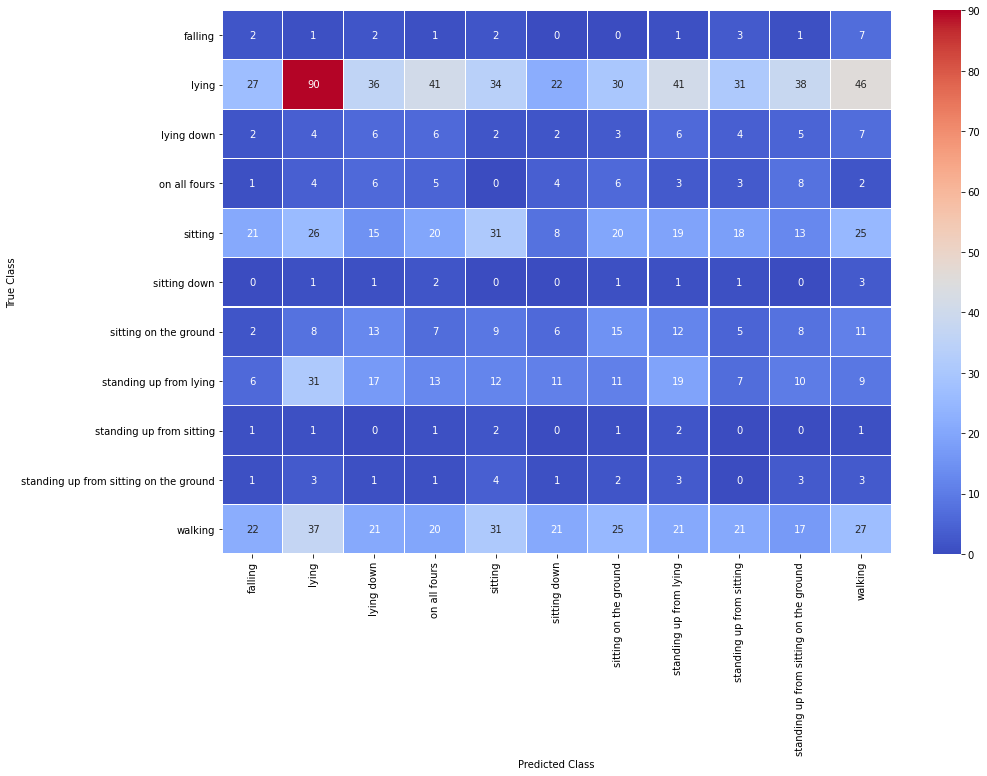

In [88]:
# 2.3. KNN - Angle Attributes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_neighbors = list(np.arange(1,21,1))
param_grid = {'n_neighbors':n_neighbors}
knn_AA = KNeighborsClassifier()
knn_AA_cv = GridSearchCV(knn_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
knn_AA_cv.fit(X_train_AA_scaled_smote, y_AA_smote)
print('K-Nearest Neighbors on Angle Attributes')
print('Cross Validation Accuracy:', knn_AA_cv.best_score_)
print('Best parameter from Cross Validation:', knn_AA_cv.best_params_)
X_test_AA_scaled = scaler_AA.transform(X_test_AA)
y_pred_AA_knn = knn_AA_cv.predict(X_test_AA_scaled)
print('Accuracy:', accuracy_score(y_test_AA, y_pred_AA_knn))
print('Precision for fall:', precision_score(y_test_AA, y_pred_AA_knn, average=None)[0])
print('Recall for fall:', recall_score(y_test_AA, y_pred_AA_knn, average=None)[0])
print('F1-score for fall:', f1_score(y_test_AA, y_pred_AA_knn, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_AA, y_pred_AA_knn, labels=knn_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=knn_AA_cv.classes_, yticklabels=knn_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

K-Nearest Neighbors on Reference and Body Attributes
Cross Validation Accuracy: 0.9765617211719284
Best parameter from Cross Validation: {'n_neighbors': 1}
Accuracy: 0.7337413925019127
Precision for fall: 0.2857142857142857
Recall for fall: 0.4
F1-score for fall: 0.3333333333333333


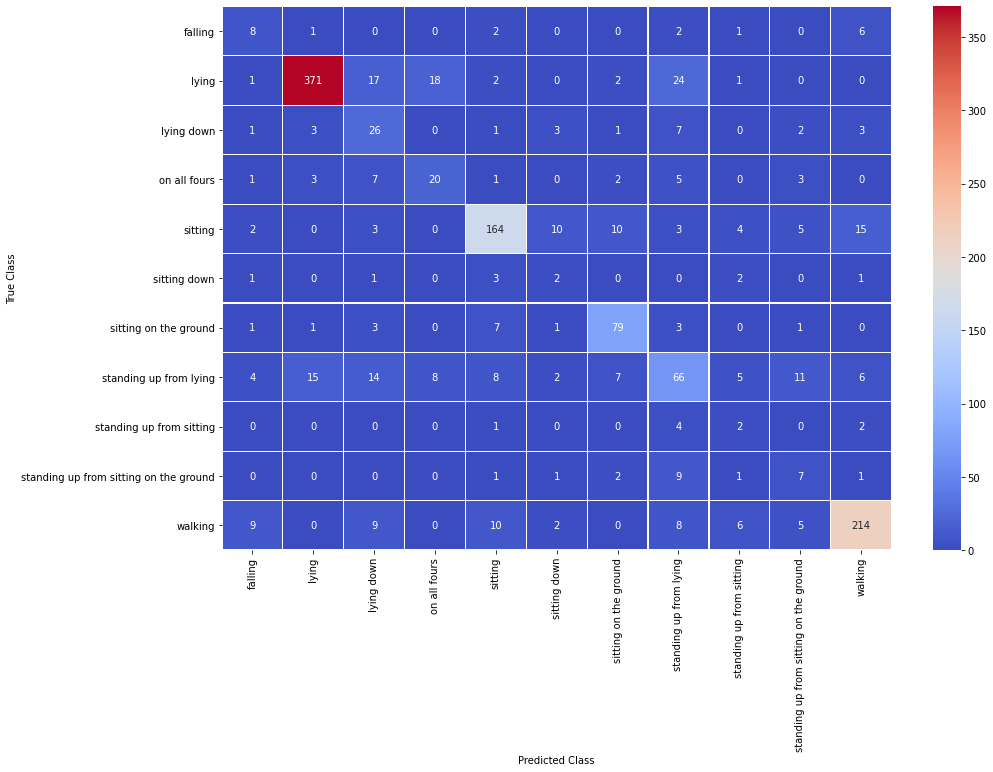

In [89]:
# 2.4. KNN - Reference+Body Attributes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_neighbors = list(np.arange(1,21,1))
param_grid = {'n_neighbors':n_neighbors}
knn_RA_BA = KNeighborsClassifier()
knn_RA_BA_cv = GridSearchCV(knn_RA_BA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
knn_RA_BA_cv.fit(X_train_RA_BA_scaled_smote, y_RA_BA_smote)
print('K-Nearest Neighbors on Reference and Body Attributes')
print('Cross Validation Accuracy:', knn_RA_BA_cv.best_score_)
print('Best parameter from Cross Validation:', knn_RA_BA_cv.best_params_)
X_test_RA_BA_scaled = scaler_RA_BA.transform(X_test_RA_BA)
y_pred_RA_BA_knn = knn_RA_BA_cv.predict(X_test_RA_BA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_BA, y_pred_RA_BA_knn))
print('Precision for fall:', precision_score(y_test_RA_BA, y_pred_RA_BA_knn, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_BA, y_pred_RA_BA_knn, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_BA, y_pred_RA_BA_knn, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_BA, y_pred_RA_BA_knn, labels=knn_RA_BA_cv.classes_), 
            annot=True, fmt='d', xticklabels=knn_RA_BA_cv.classes_, yticklabels=knn_RA_BA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

K-Nearest Neighbors on Reference and Angle Attributes
Cross Validation Accuracy: 0.9798311658018802
Best parameter from Cross Validation: {'n_neighbors': 1}
Accuracy: 0.7628156082631982
Precision for fall: 0.2
Recall for fall: 0.35
F1-score for fall: 0.2545454545454545


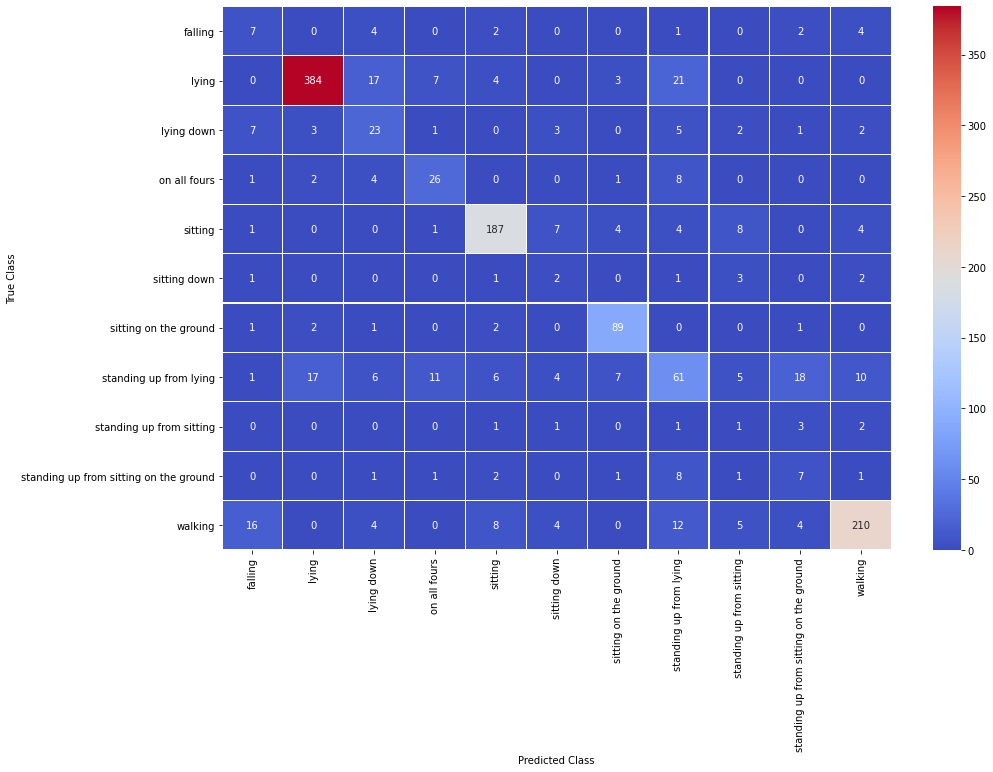

In [90]:
# 2.5. KNN - Reference+Angle Attributes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_neighbors = list(np.arange(1,21,1))
param_grid = {'n_neighbors':n_neighbors}
knn_RA_AA = KNeighborsClassifier()
knn_RA_AA_cv = GridSearchCV(knn_RA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
knn_RA_AA_cv.fit(X_train_RA_AA_scaled_smote, y_RA_AA_smote)
print('K-Nearest Neighbors on Reference and Angle Attributes')
print('Cross Validation Accuracy:', knn_RA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', knn_RA_AA_cv.best_params_)
X_test_RA_AA_scaled = scaler_RA_AA.transform(X_test_RA_AA)
y_pred_RA_AA_knn = knn_RA_AA_cv.predict(X_test_RA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_AA, y_pred_RA_AA_knn))
print('Precision for fall:', precision_score(y_test_RA_AA, y_pred_RA_AA_knn, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_AA, y_pred_RA_AA_knn, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_AA, y_pred_RA_AA_knn, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_AA, y_pred_RA_AA_knn, labels=knn_RA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=knn_RA_AA_cv.classes_, yticklabels=knn_RA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

K-Nearest Neighbors on Body and Angle Attributes
Cross Validation Accuracy: 0.9648770861098932
Best parameter from Cross Validation: {'n_neighbors': 1}
Accuracy: 0.6250956388676359
Precision for fall: 0.25806451612903225
Recall for fall: 0.4
F1-score for fall: 0.3137254901960784


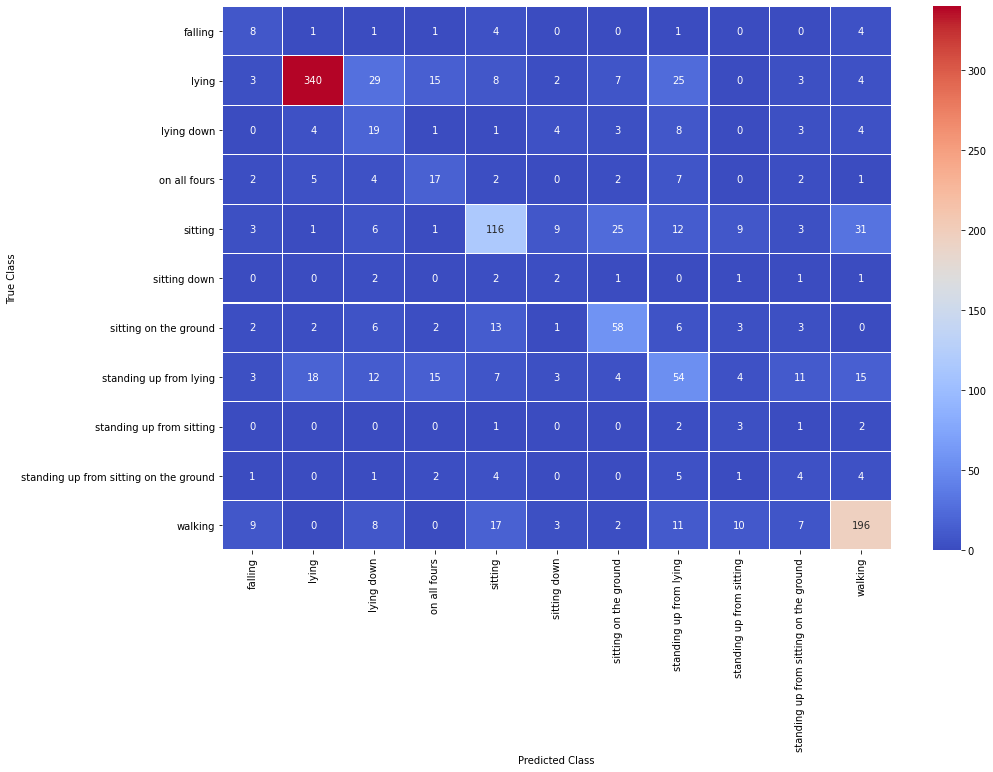

In [91]:
# 2.6. KNN - Body+Angle Attributes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_neighbors = list(np.arange(1,21,1))
param_grid = {'n_neighbors':n_neighbors}
knn_BA_AA = KNeighborsClassifier()
knn_BA_AA_cv = GridSearchCV(knn_BA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
knn_BA_AA_cv.fit(X_train_BA_AA_scaled_smote, y_BA_AA_smote)
print('K-Nearest Neighbors on Body and Angle Attributes')
print('Cross Validation Accuracy:', knn_BA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', knn_BA_AA_cv.best_params_)
X_test_BA_AA_scaled = scaler_BA_AA.transform(X_test_BA_AA)
y_pred_BA_AA_knn = knn_BA_AA_cv.predict(X_test_BA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_BA_AA, y_pred_BA_AA_knn))
print('Precision for fall:', precision_score(y_test_BA_AA, y_pred_BA_AA_knn, average=None)[0])
print('Recall for fall:', recall_score(y_test_BA_AA, y_pred_BA_AA_knn, average=None)[0])
print('F1-score for fall:', f1_score(y_test_BA_AA, y_pred_BA_AA_knn, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_BA_AA, y_pred_BA_AA_knn, labels=knn_BA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=knn_BA_AA_cv.classes_, yticklabels=knn_BA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

K-Nearest Neighbors on All Attributes
Cross Validation Accuracy: 0.9768400304683592
Best parameter from Cross Validation: {'n_neighbors': 1}
Accuracy: 0.740627390971691
Precision for fall: 0.26666666666666666
Recall for fall: 0.4
F1-score for fall: 0.32


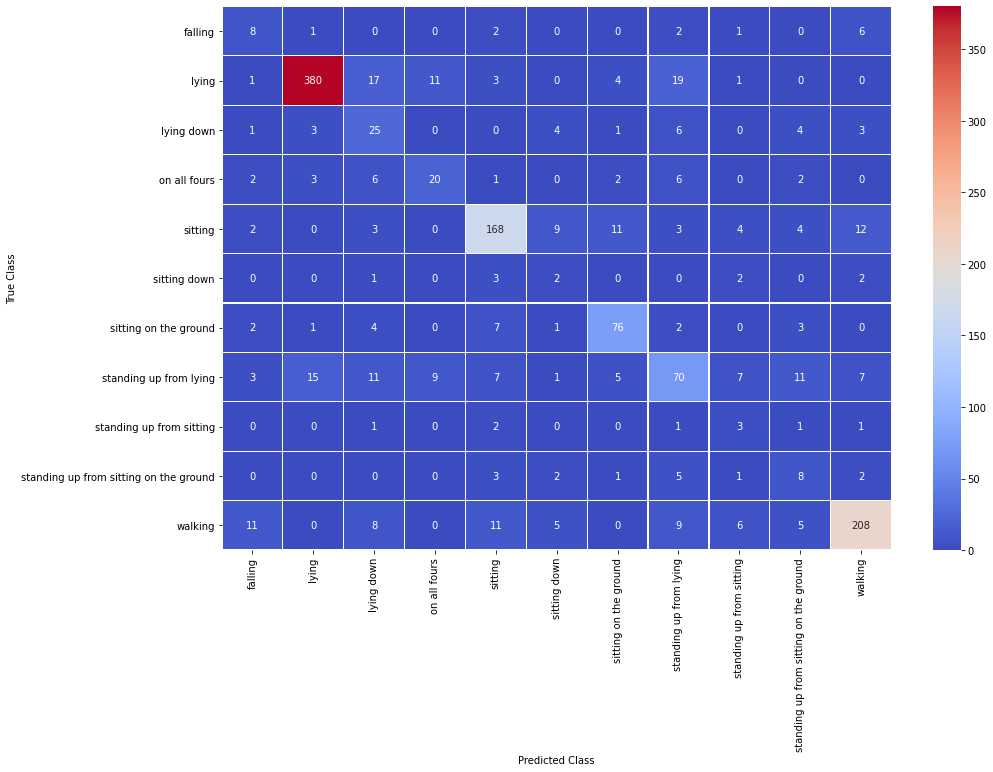

In [92]:
# 2.7. KNN - Reference+Body+Angle Attributes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_neighbors = list(np.arange(1,21,1))
param_grid = {'n_neighbors':n_neighbors}
knn_RA_BA_AA = KNeighborsClassifier()
knn_RA_BA_AA_cv = GridSearchCV(knn_RA_BA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
knn_RA_BA_AA_cv.fit(X_train_RA_BA_AA_scaled_smote, y_RA_BA_AA_smote)
print('K-Nearest Neighbors on All Attributes')
print('Cross Validation Accuracy:', knn_RA_BA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', knn_RA_BA_AA_cv.best_params_)
X_test_RA_BA_AA_scaled = scaler_RA_BA_AA.transform(X_test_RA_BA_AA)
y_pred_RA_BA_AA_knn = knn_RA_BA_AA_cv.predict(X_test_RA_BA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_knn))
print('Precision for fall:', precision_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_knn, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_knn, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_knn, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_BA_AA, y_pred_RA_BA_AA_knn, labels=knn_RA_BA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=knn_RA_BA_AA_cv.classes_, yticklabels=knn_RA_BA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

## 3. Support Vector Machine

SVM on Reference Attributes
Cross Validation Accuracy: 0.9829608024754091
Best parameter from Cross Validation: {'C': 100, 'gamma': 'scale'}
Accuracy: 0.8064269319051263
Precision for fall: 0.30303030303030304
Recall for fall: 0.5
F1-score for fall: 0.37735849056603776


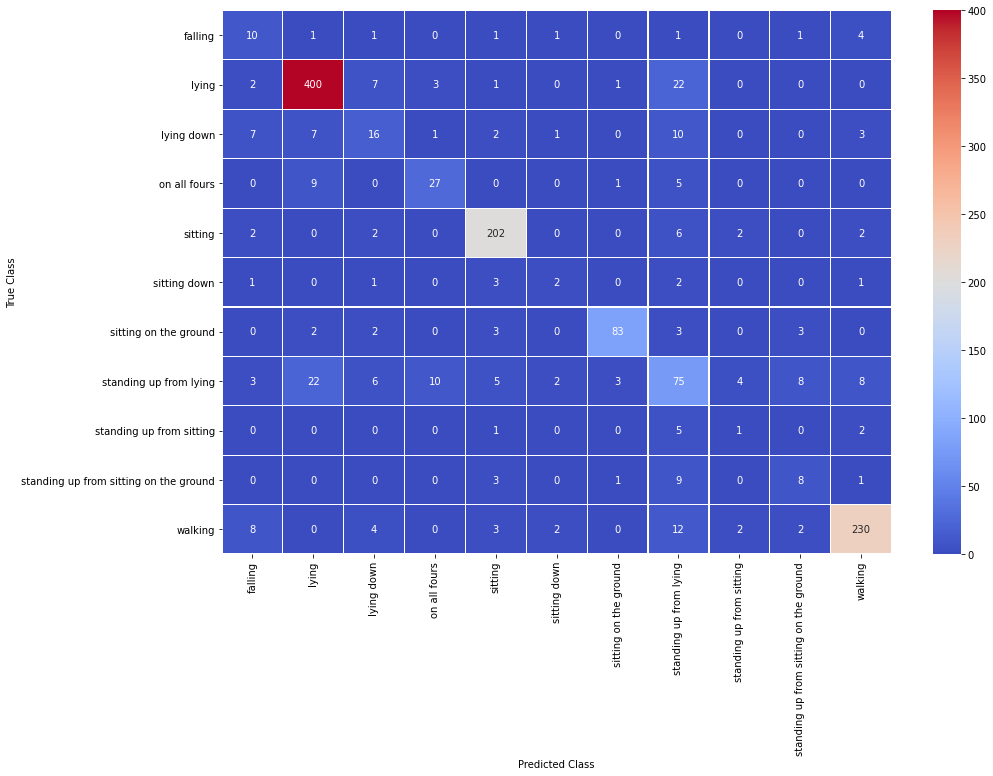

In [98]:
# 3.1. SVM - Referenece Attributes
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = [.0001, .001, 0.01, 1, 'scale', 'auto']
param_grid = {'C':C, 'gamma':gamma}
svm_RA = SVC()
svm_RA_cv = GridSearchCV(svm_RA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
svm_RA_cv.fit(X_train_RA_scaled_smote, y_RA_smote)
print('SVM on Reference Attributes')
print('Cross Validation Accuracy:', svm_RA_cv.best_score_)
print('Best parameter from Cross Validation:', svm_RA_cv.best_params_)
X_test_RA_scaled = scaler_RA.transform(X_test_RA)
y_pred_RA_svm = svm_RA_cv.predict(X_test_RA_scaled)
print('Accuracy:', accuracy_score(y_test_RA, y_pred_RA_svm))
print('Precision for fall:', precision_score(y_test_RA, y_pred_RA_svm, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA, y_pred_RA_svm, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA, y_pred_RA_svm, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA, y_pred_RA_svm, labels=svm_RA_cv.classes_), 
            annot=True, fmt='d', xticklabels=svm_RA_cv.classes_, yticklabels=svm_RA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

SVM on Body Attributes
Cross Validation Accuracy: 0.9851169131332371
Best parameter from Cross Validation: {'C': 100, 'gamma': 'scale'}
Accuracy: 0.8125478194338179
Precision for fall: 0.5714285714285714
Recall for fall: 0.2
F1-score for fall: 0.29629629629629634


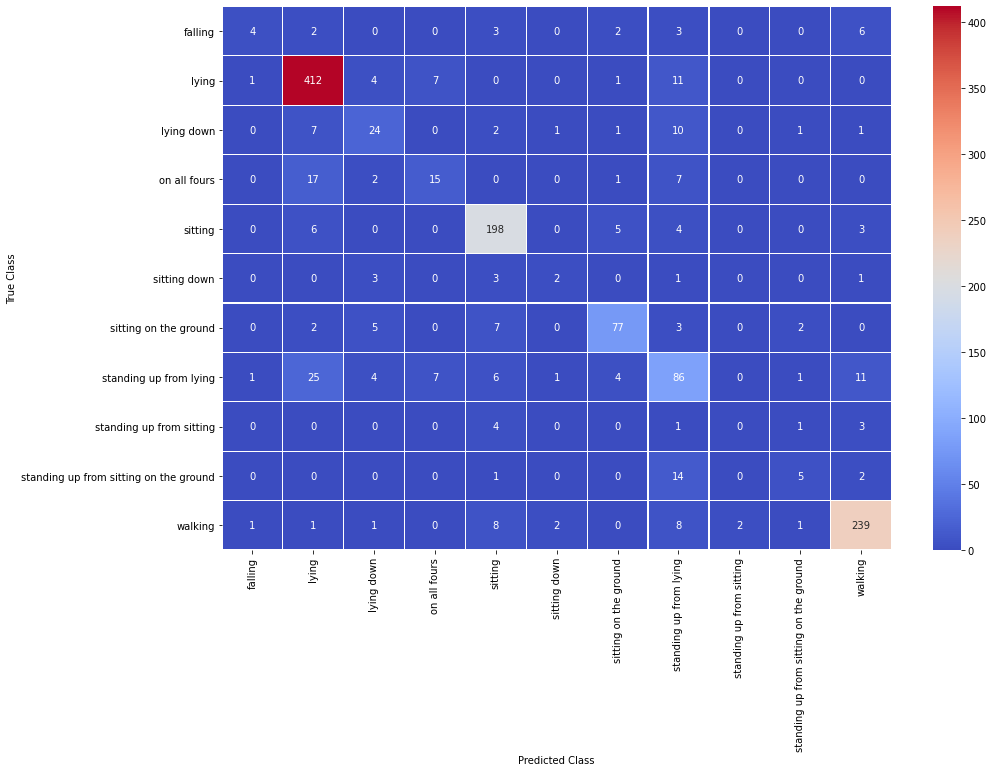

In [99]:
# 3.2. SVM - Body Attributes
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = [.0001, .001, 0.01, 1, 'scale', 'auto']
param_grid = {'C':C, 'gamma':gamma}
svm_BA = SVC()
svm_BA_cv = GridSearchCV(svm_BA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
svm_BA_cv.fit(X_train_BA_scaled_smote, y_BA_smote)
print('SVM on Body Attributes')
print('Cross Validation Accuracy:', svm_BA_cv.best_score_)
print('Best parameter from Cross Validation:', svm_BA_cv.best_params_)
X_test_BA_scaled = scaler_BA.transform(X_test_BA)
y_pred_BA_svm = svm_BA_cv.predict(X_test_BA_scaled)
print('Accuracy:', accuracy_score(y_test_BA, y_pred_BA_svm))
print('Precision for fall:', precision_score(y_test_BA, y_pred_BA_svm, average=None)[0])
print('Recall for fall:', recall_score(y_test_BA, y_pred_BA_svm, average=None)[0])
print('F1-score for fall:', f1_score(y_test_BA, y_pred_BA_svm, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_BA, y_pred_BA_svm, labels=svm_BA_cv.classes_), 
            annot=True, fmt='d', xticklabels=svm_BA_cv.classes_, yticklabels=svm_BA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

SVM on Angle Attributes
Cross Validation Accuracy: 0.2515144168183794
Best parameter from Cross Validation: {'C': 100, 'gamma': 1}
Accuracy: 0.1423106350420811
Precision for fall: 0.014492753623188406
Recall for fall: 0.1
F1-score for fall: 0.02531645569620253


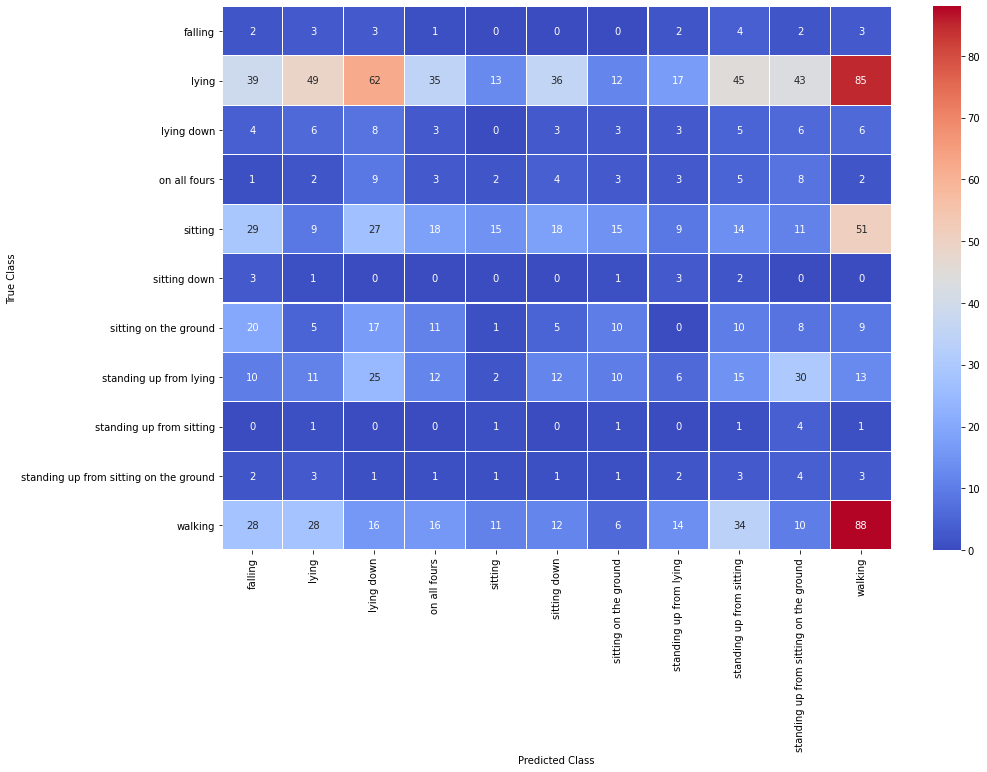

In [100]:
# 3.3. SVM - Angle Attributes
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = [.0001, .001, 0.01, 1, 'scale', 'auto']
param_grid = {'C':C, 'gamma':gamma}
svm_AA = SVC()
svm_AA_cv = GridSearchCV(svm_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
svm_AA_cv.fit(X_train_AA_scaled_smote, y_AA_smote)
print('SVM on Angle Attributes')
print('Cross Validation Accuracy:', svm_AA_cv.best_score_)
print('Best parameter from Cross Validation:', svm_AA_cv.best_params_)
X_test_AA_scaled = scaler_AA.transform(X_test_AA)
y_pred_AA_svm = svm_AA_cv.predict(X_test_AA_scaled)
print('Accuracy:', accuracy_score(y_test_AA, y_pred_AA_svm))
print('Precision for fall:', precision_score(y_test_AA, y_pred_AA_svm, average=None)[0])
print('Recall for fall:', recall_score(y_test_AA, y_pred_AA_svm, average=None)[0])
print('F1-score for fall:', f1_score(y_test_AA, y_pred_AA_svm, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_AA, y_pred_AA_svm, labels=svm_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=svm_AA_cv.classes_, yticklabels=svm_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

SVM on Reference and Body Attributes
Cross Validation Accuracy: 0.98963732199771
Best parameter from Cross Validation: {'C': 10, 'gamma': 'scale'}
Accuracy: 0.8576893649579189
Precision for fall: 0.6875
Recall for fall: 0.55
F1-score for fall: 0.6111111111111112


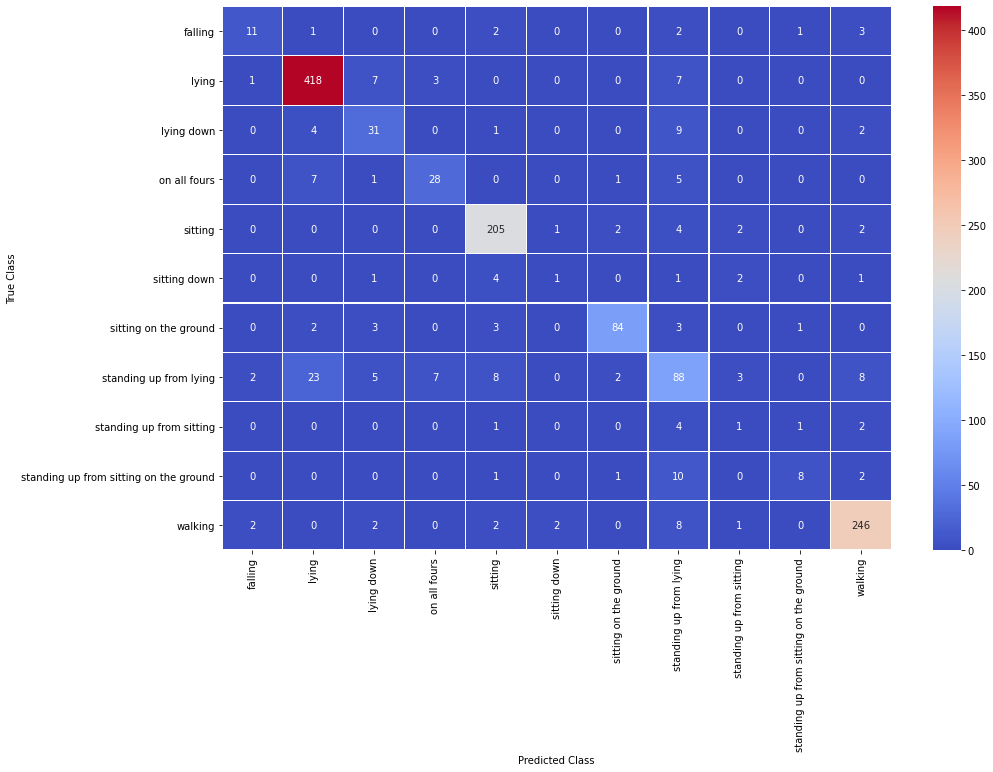

In [101]:
# 3.4. SVM - Reference+Body Attributes
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = [.0001, .001, 0.01, 1, 'scale', 'auto']
param_grid = {'C':C, 'gamma':gamma}
svm_RA_BA = SVC()
svm_RA_BA_cv = GridSearchCV(svm_RA_BA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
svm_RA_BA_cv.fit(X_train_RA_BA_scaled_smote, y_RA_BA_smote)
print('SVM on Reference and Body Attributes')
print('Cross Validation Accuracy:', svm_RA_BA_cv.best_score_)
print('Best parameter from Cross Validation:', svm_RA_BA_cv.best_params_)
X_test_RA_BA_scaled = scaler_RA_BA.transform(X_test_RA_BA)
y_pred_RA_BA_svm = svm_RA_BA_cv.predict(X_test_RA_BA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_BA, y_pred_RA_BA_svm))
print('Precision for fall:', precision_score(y_test_RA_BA, y_pred_RA_BA_svm, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_BA, y_pred_RA_BA_svm, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_BA, y_pred_RA_BA_svm, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_BA, y_pred_RA_BA_svm, labels=svm_RA_BA_cv.classes_), 
            annot=True, fmt='d', xticklabels=svm_RA_BA_cv.classes_, yticklabels=svm_RA_BA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

SVM on Reference and Angle Attributes
Cross Validation Accuracy: 0.9846997637443948
Best parameter from Cross Validation: {'C': 100, 'gamma': 'scale'}
Accuracy: 0.8163733741392502
Precision for fall: 0.32142857142857145
Recall for fall: 0.45
F1-score for fall: 0.375


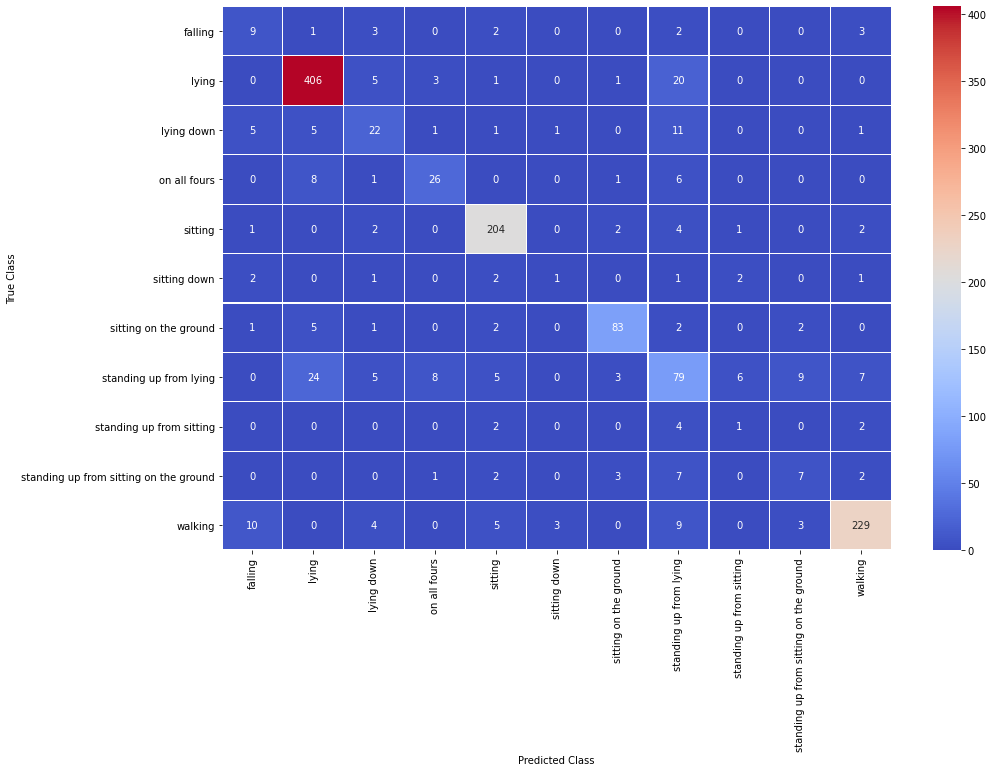

In [102]:
# 3.5. SVM - Reference+Angle Attributes
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = [.0001, .001, 0.01, 1, 'scale', 'auto']
param_grid = {'C':C, 'gamma':gamma}
svm_RA_AA = SVC()
svm_RA_AA_cv = GridSearchCV(svm_RA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
svm_RA_AA_cv.fit(X_train_RA_AA_scaled_smote, y_RA_AA_smote)
print('SVM on Reference and Angle Attributes')
print('Cross Validation Accuracy:', svm_RA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', svm_RA_AA_cv.best_params_)
X_test_RA_AA_scaled = scaler_RA_AA.transform(X_test_RA_AA)
y_pred_RA_AA_svm = svm_RA_AA_cv.predict(X_test_RA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_AA, y_pred_RA_AA_svm))
print('Precision for fall:', precision_score(y_test_RA_AA, y_pred_RA_AA_svm, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_AA, y_pred_RA_AA_svm, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_AA, y_pred_RA_AA_svm, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_AA, y_pred_RA_AA_svm, labels=svm_RA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=svm_RA_AA_cv.classes_, yticklabels=svm_RA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

SVM on Body and Angle Attributes
Cross Validation Accuracy: 0.9864379507221719
Best parameter from Cross Validation: {'C': 100, 'gamma': 'scale'}
Accuracy: 0.8201989288446825
Precision for fall: 0.5
Recall for fall: 0.25
F1-score for fall: 0.3333333333333333


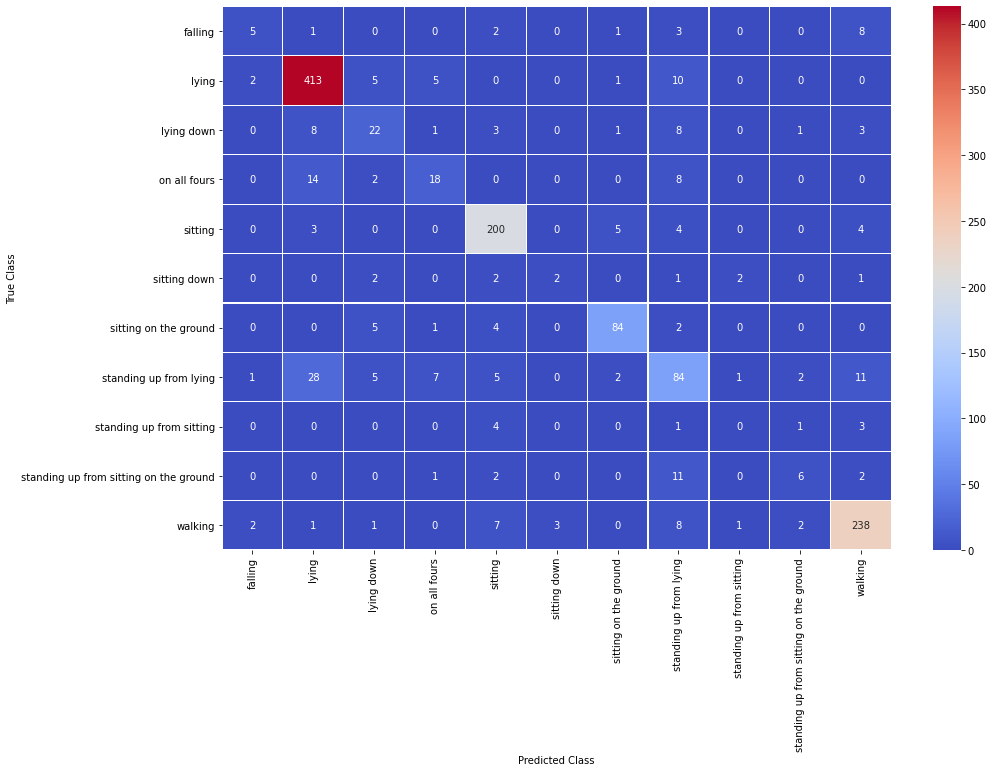

In [103]:
# 3.6. SVM - Body+Angle Attributes
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = [.0001, .001, 0.01, 1, 'scale', 'auto']
param_grid = {'C':C, 'gamma':gamma}
svm_BA_AA = SVC()
svm_BA_AA_cv = GridSearchCV(svm_BA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
svm_BA_AA_cv.fit(X_train_BA_AA_scaled_smote, y_BA_AA_smote)
print('SVM on Body and Angle Attributes')
print('Cross Validation Accuracy:', svm_BA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', svm_BA_AA_cv.best_params_)
X_test_BA_AA_scaled = scaler_BA_AA.transform(X_test_BA_AA)
y_pred_BA_AA_svm = svm_BA_AA_cv.predict(X_test_BA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_BA_AA, y_pred_BA_AA_svm))
print('Precision for fall:', precision_score(y_test_BA_AA, y_pred_BA_AA_svm, average=None)[0])
print('Recall for fall:', recall_score(y_test_BA_AA, y_pred_BA_AA_svm, average=None)[0])
print('F1-score for fall:', f1_score(y_test_BA_AA, y_pred_BA_AA_svm, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_BA_AA, y_pred_BA_AA_svm, labels=svm_BA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=svm_BA_AA_cv.classes_, yticklabels=svm_BA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

SVM on All Attributes
Cross Validation Accuracy: 0.9902632880469764
Best parameter from Cross Validation: {'C': 10, 'gamma': 'scale'}
Accuracy: 0.854628921193573
Precision for fall: 0.7142857142857143
Recall for fall: 0.5
F1-score for fall: 0.588235294117647


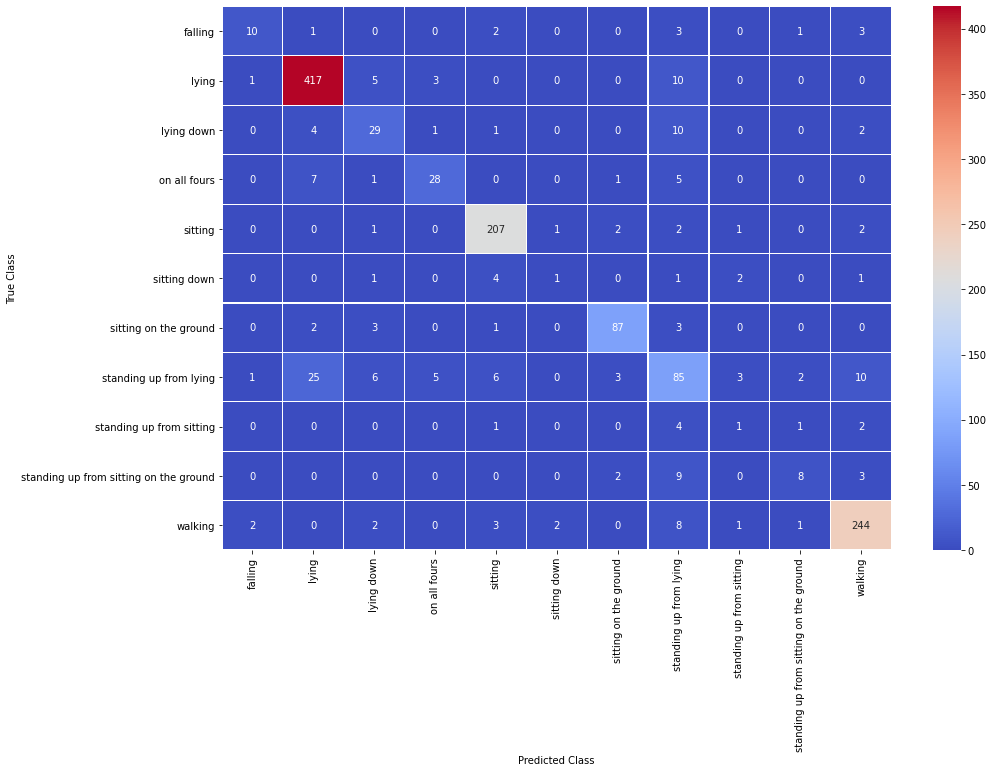

In [104]:
# 3.7. SVM - All Attributes
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = [.0001, .001, 0.01, 1, 'scale', 'auto']
param_grid = {'C':C, 'gamma':gamma}
svm_RA_BA_AA = SVC()
svm_RA_BA_AA_cv = GridSearchCV(svm_RA_BA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
svm_RA_BA_AA_cv.fit(X_train_RA_BA_AA_scaled_smote, y_RA_BA_AA_smote)
print('SVM on All Attributes')
print('Cross Validation Accuracy:', svm_RA_BA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', svm_RA_BA_AA_cv.best_params_)
X_test_RA_BA_AA_scaled = scaler_RA_BA_AA.transform(X_test_RA_BA_AA)
y_pred_RA_BA_AA_svm = svm_RA_BA_AA_cv.predict(X_test_RA_BA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_svm))
print('Precision for fall:', precision_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_svm, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_svm, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_svm, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_BA_AA, y_pred_RA_BA_AA_svm, labels=svm_RA_BA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=svm_RA_BA_AA_cv.classes_, yticklabels=svm_RA_BA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

SVM on Reference Attributes
Cross Validation Accuracy: 0.9821954156153245
Best parameter from Cross Validation: {'n_estimators': 600}
Accuracy: 0.8638102524866106
Precision for fall: 0.5555555555555556
Recall for fall: 0.5
F1-score for fall: 0.5263157894736842


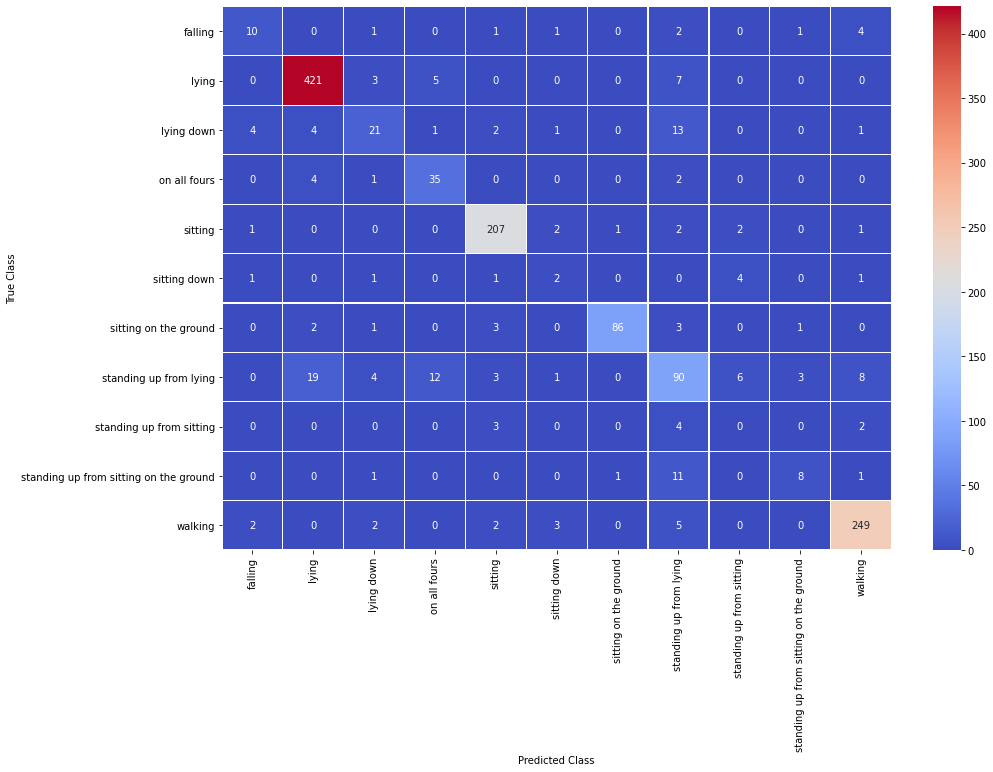

In [110]:
# 4.1. Adaboost - Referenece Attributes
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_estimators = [50, 100, 200, 400, 600, 800, 1000]
param_grid = {'n_estimators':n_estimators}
adb_RA = AdaBoostClassifier(DecisionTreeClassifier(max_depth=16), random_state=42)
adb_RA_cv = GridSearchCV(adb_RA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
adb_RA_cv.fit(X_train_RA_scaled_smote, y_RA_smote)
print('SVM on Reference Attributes')
print('Cross Validation Accuracy:', adb_RA_cv.best_score_)
print('Best parameter from Cross Validation:', adb_RA_cv.best_params_)
X_test_RA_scaled = scaler_RA.transform(X_test_RA)
y_pred_RA_adb = adb_RA_cv.predict(X_test_RA_scaled)
print('Accuracy:', accuracy_score(y_test_RA, y_pred_RA_adb))
print('Precision for fall:', precision_score(y_test_RA, y_pred_RA_adb, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA, y_pred_RA_adb, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA, y_pred_RA_adb, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA, y_pred_RA_adb, labels=adb_RA_cv.classes_), 
            annot=True, fmt='d', xticklabels=adb_RA_cv.classes_, yticklabels=adb_RA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

## 4. Adaboost

Adaboost on Reference Attributes
Cross Validation Accuracy: 0.9819867925277027
Best parameter from Cross Validation: {'n_estimators': 1000}
Accuracy: 0.8592195868400918
Precision for fall: 0.5333333333333333
Recall for fall: 0.4
F1-score for fall: 0.4571428571428572


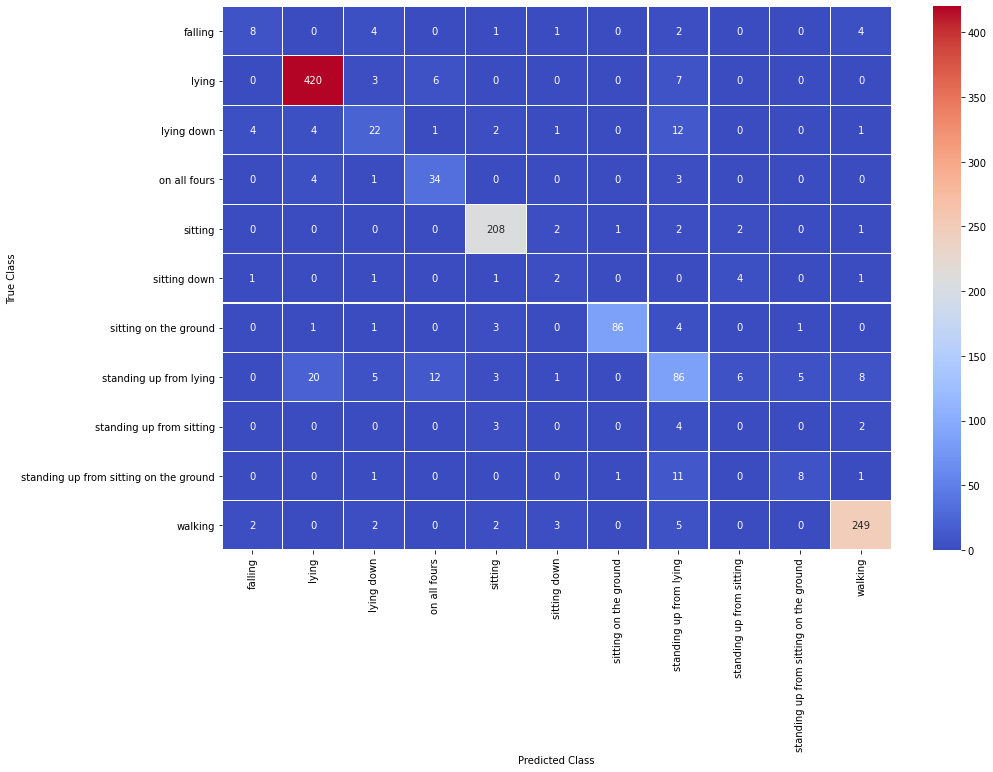

In [112]:
# 4.1. Adaboost - Referenece Attributes
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_estimators = [1000]
param_grid = {'n_estimators':n_estimators}
adb_RA = AdaBoostClassifier(DecisionTreeClassifier(max_depth=16), random_state=42)
adb_RA_cv = GridSearchCV(adb_RA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
adb_RA_cv.fit(X_train_RA_scaled_smote, y_RA_smote)
print('Adaboost on Reference Attributes')
print('Cross Validation Accuracy:', adb_RA_cv.best_score_)
print('Best parameter from Cross Validation:', adb_RA_cv.best_params_)
X_test_RA_scaled = scaler_RA.transform(X_test_RA)
y_pred_RA_adb = adb_RA_cv.predict(X_test_RA_scaled)
print('Accuracy:', accuracy_score(y_test_RA, y_pred_RA_adb))
print('Precision for fall:', precision_score(y_test_RA, y_pred_RA_adb, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA, y_pred_RA_adb, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA, y_pred_RA_adb, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA, y_pred_RA_adb, labels=adb_RA_cv.classes_), 
            annot=True, fmt='d', xticklabels=adb_RA_cv.classes_, yticklabels=adb_RA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Adaboost on Body Attributes
Cross Validation Accuracy: 0.9834473961070576
Best parameter from Cross Validation: {'n_estimators': 1000}
Accuracy: 0.8385615914307575
Precision for fall: 0.8
Recall for fall: 0.4
F1-score for fall: 0.5333333333333333


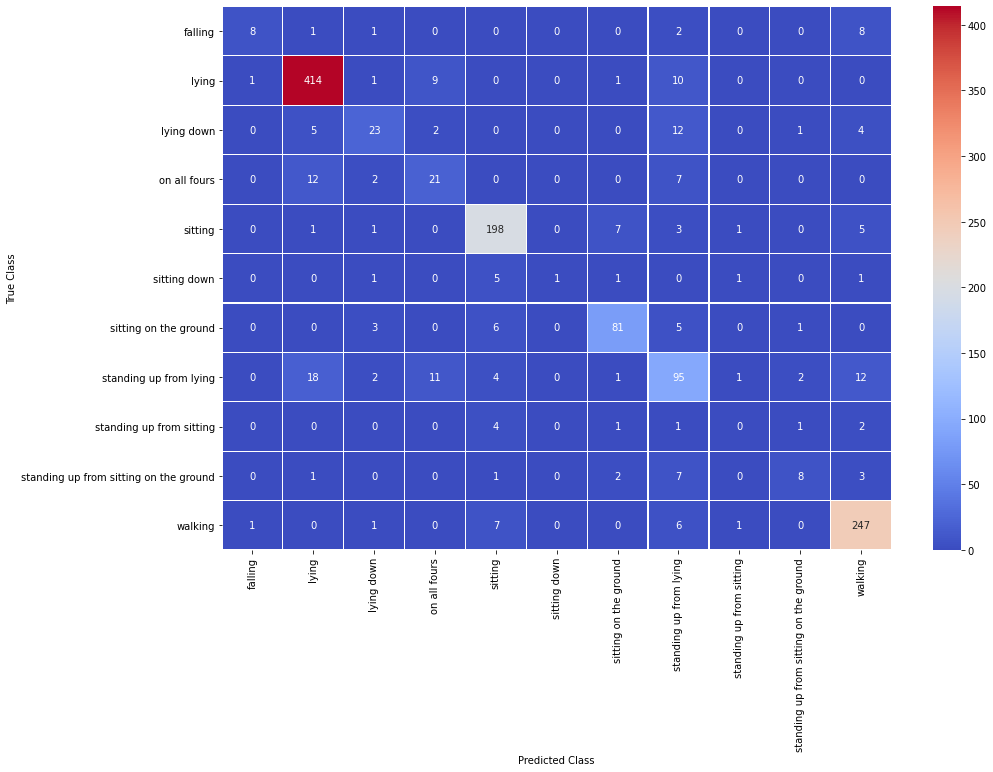

In [113]:
# 4.2. Adaboost - Body Attributes
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_estimators = [1000]
param_grid = {'n_estimators':n_estimators}
adb_BA = AdaBoostClassifier(DecisionTreeClassifier(max_depth=16), random_state=42)
adb_BA_cv = GridSearchCV(adb_BA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
adb_BA_cv.fit(X_train_BA_scaled_smote, y_BA_smote)
print('Adaboost on Body Attributes')
print('Cross Validation Accuracy:', adb_BA_cv.best_score_)
print('Best parameter from Cross Validation:', adb_BA_cv.best_params_)
X_test_BA_scaled = scaler_BA.transform(X_test_BA)
y_pred_BA_adb = adb_BA_cv.predict(X_test_BA_scaled)
print('Accuracy:', accuracy_score(y_test_BA, y_pred_BA_adb))
print('Precision for fall:', precision_score(y_test_BA, y_pred_BA_adb, average=None)[0])
print('Recall for fall:', recall_score(y_test_BA, y_pred_BA_adb, average=None)[0])
print('F1-score for fall:', f1_score(y_test_BA, y_pred_BA_adb, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_BA, y_pred_BA_adb, labels=adb_BA_cv.classes_), 
            annot=True, fmt='d', xticklabels=adb_BA_cv.classes_, yticklabels=adb_BA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Adaboost on Angle Attributes
Cross Validation Accuracy: 0.48007356734349393
Best parameter from Cross Validation: {'n_estimators': 1000}
Accuracy: 0.14460596786534047
Precision for fall: 0.021739130434782608
Recall for fall: 0.1
F1-score for fall: 0.03571428571428571


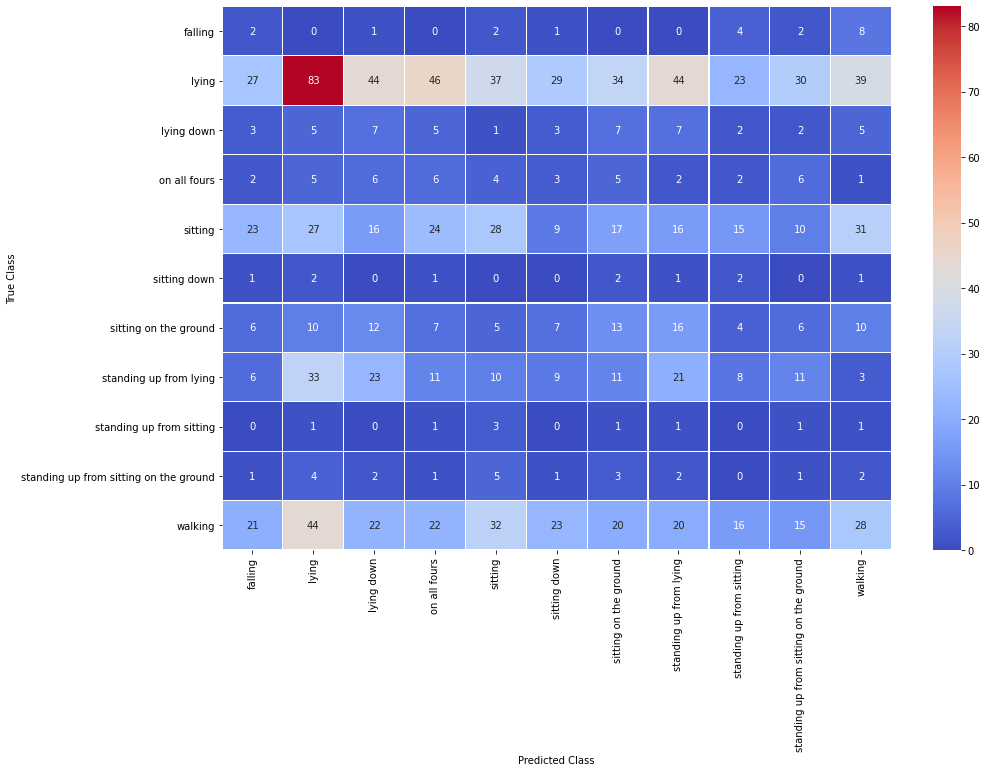

In [114]:
# 4.3. Adaboost - Angle Attributes
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_estimators = [1000]
param_grid = {'n_estimators':n_estimators}
adb_AA = AdaBoostClassifier(DecisionTreeClassifier(max_depth=16), random_state=42)
adb_AA_cv = GridSearchCV(adb_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
adb_AA_cv.fit(X_train_AA_scaled_smote, y_AA_smote)
print('Adaboost on Angle Attributes')
print('Cross Validation Accuracy:', adb_AA_cv.best_score_)
print('Best parameter from Cross Validation:', adb_AA_cv.best_params_)
X_test_AA_scaled = scaler_AA.transform(X_test_AA)
y_pred_AA_adb = adb_AA_cv.predict(X_test_AA_scaled)
print('Accuracy:', accuracy_score(y_test_AA, y_pred_AA_adb))
print('Precision for fall:', precision_score(y_test_AA, y_pred_AA_adb, average=None)[0])
print('Recall for fall:', recall_score(y_test_AA, y_pred_AA_adb, average=None)[0])
print('F1-score for fall:', f1_score(y_test_AA, y_pred_AA_adb, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_AA, y_pred_AA_adb, labels=adb_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=adb_AA_cv.classes_, yticklabels=adb_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Adaboost on Reference and Body Attributes
Cross Validation Accuracy: 0.9878986510879276
Best parameter from Cross Validation: {'n_estimators': 1000}
Accuracy: 0.8783473603672532
Precision for fall: 0.8181818181818182
Recall for fall: 0.45
F1-score for fall: 0.5806451612903226


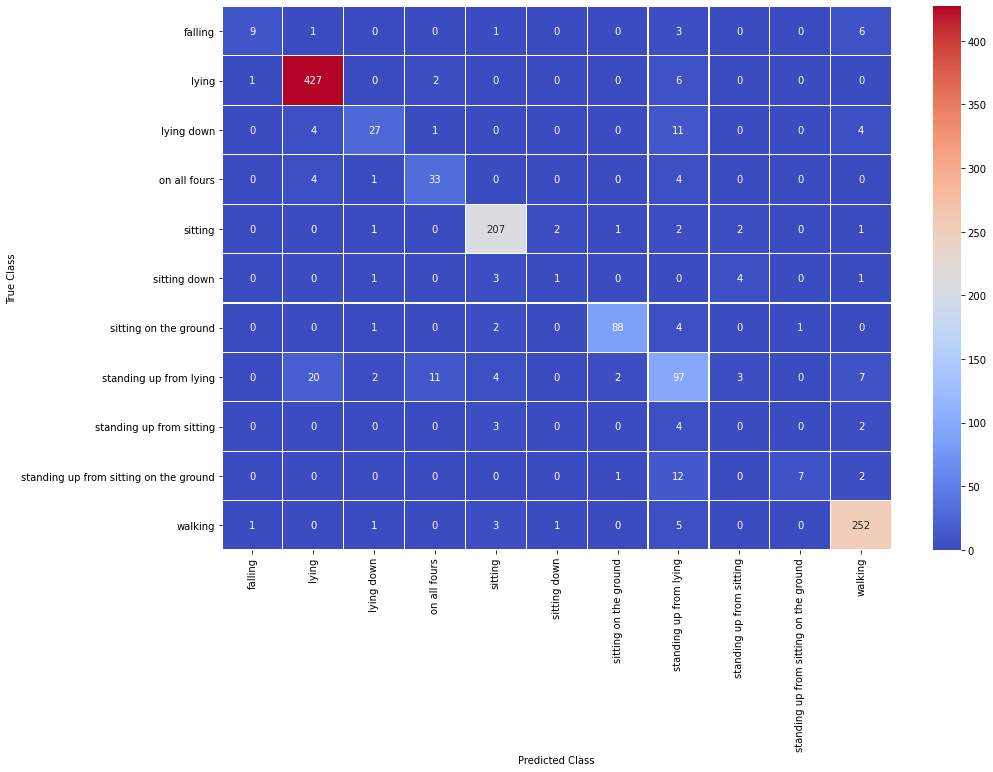

In [115]:
# 4.4. Adaboost - Reference+Body Attributes
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_estimators = [1000]
param_grid = {'n_estimators':n_estimators}
adb_RA_BA = AdaBoostClassifier(DecisionTreeClassifier(max_depth=16), random_state=42)
adb_RA_BA_cv = GridSearchCV(adb_RA_BA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
adb_RA_BA_cv.fit(X_train_RA_BA_scaled_smote, y_RA_BA_smote)
print('Adaboost on Reference and Body Attributes')
print('Cross Validation Accuracy:', adb_RA_BA_cv.best_score_)
print('Best parameter from Cross Validation:', adb_RA_BA_cv.best_params_)
X_test_RA_BA_scaled = scaler_RA_BA.transform(X_test_RA_BA)
y_pred_RA_BA_adb = adb_RA_BA_cv.predict(X_test_RA_BA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_BA, y_pred_RA_BA_adb))
print('Precision for fall:', precision_score(y_test_RA_BA, y_pred_RA_BA_adb, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_BA, y_pred_RA_BA_adb, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_BA, y_pred_RA_BA_adb, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_BA, y_pred_RA_BA_adb, labels=adb_RA_BA_cv.classes_), 
            annot=True, fmt='d', xticklabels=adb_RA_BA_cv.classes_, yticklabels=adb_RA_BA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Adaboost on Reference and Angle Attributes
Cross Validation Accuracy: 0.9833775647186467
Best parameter from Cross Validation: {'n_estimators': 1000}
Accuracy: 0.8630451415455241
Precision for fall: 0.5
Recall for fall: 0.35
F1-score for fall: 0.4117647058823529


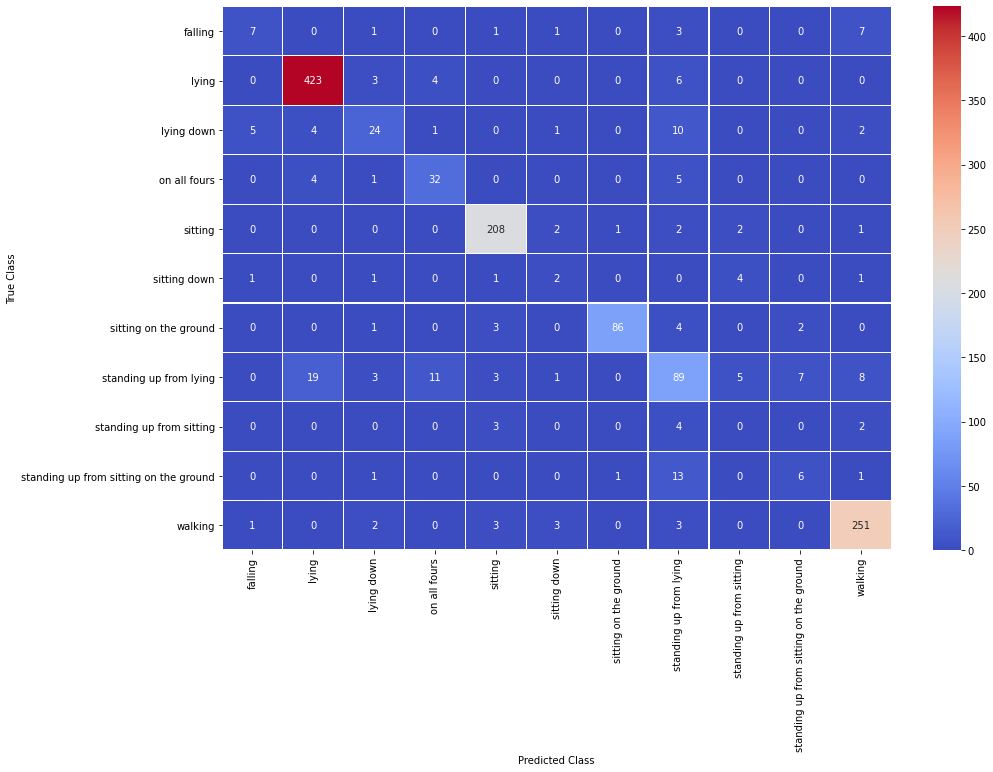

In [116]:
# 4.5. Adaboost - Reference+Angle Attributes
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_estimators = [1000]
param_grid = {'n_estimators':n_estimators}
adb_RA_AA = AdaBoostClassifier(DecisionTreeClassifier(max_depth=16), random_state=42)
adb_RA_AA_cv = GridSearchCV(adb_RA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
adb_RA_AA_cv.fit(X_train_RA_AA_scaled_smote, y_RA_AA_smote)
print('Adaboost on Reference and Angle Attributes')
print('Cross Validation Accuracy:', adb_RA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', adb_RA_AA_cv.best_params_)
X_test_RA_AA_scaled = scaler_RA_AA.transform(X_test_RA_AA)
y_pred_RA_AA_adb = adb_RA_AA_cv.predict(X_test_RA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_AA, y_pred_RA_AA_adb))
print('Precision for fall:', precision_score(y_test_RA_AA, y_pred_RA_AA_adb, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_AA, y_pred_RA_AA_adb, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_AA, y_pred_RA_AA_adb, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_AA, y_pred_RA_AA_adb, labels=adb_RA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=adb_RA_AA_cv.classes_, yticklabels=adb_RA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Adaboost on Body and Angle Attributes
Cross Validation Accuracy: 0.9842123474283369
Best parameter from Cross Validation: {'n_estimators': 1000}
Accuracy: 0.8454475899005356
Precision for fall: 0.8888888888888888
Recall for fall: 0.4
F1-score for fall: 0.5517241379310346


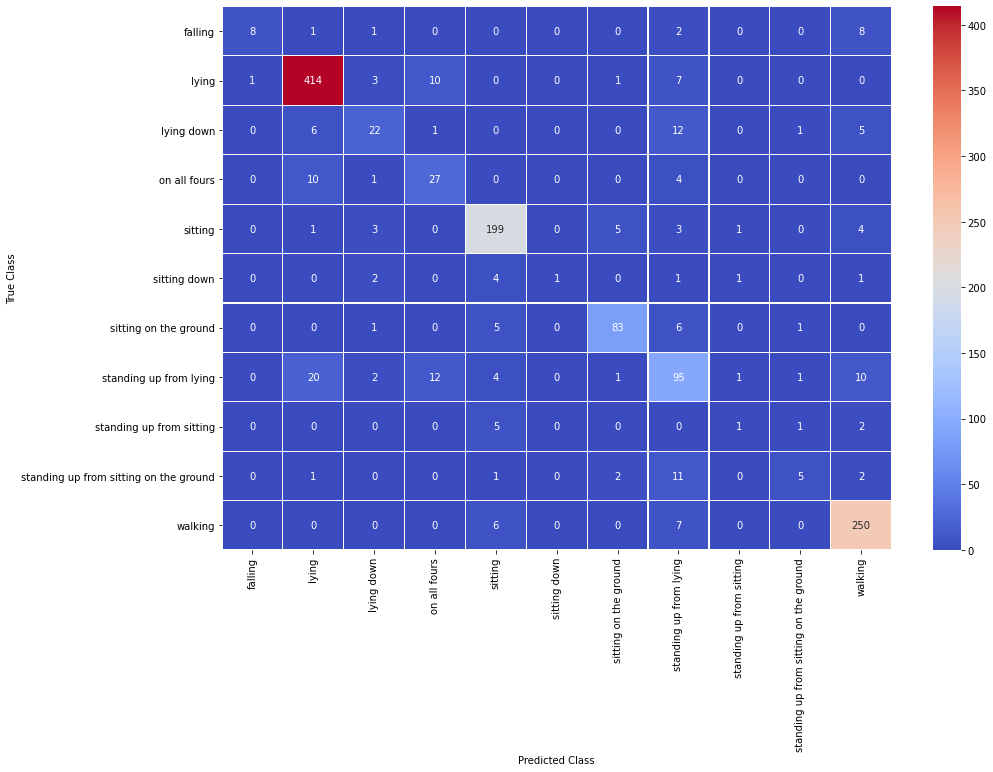

In [117]:
# 4.6. Adaboost - Body+Angle Attributes
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_estimators = [1000]
param_grid = {'n_estimators':n_estimators}
adb_BA_AA = AdaBoostClassifier(DecisionTreeClassifier(max_depth=16), random_state=42)
adb_BA_AA_cv = GridSearchCV(adb_BA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
adb_BA_AA_cv.fit(X_train_BA_AA_scaled_smote, y_BA_AA_smote)
print('Adaboost on Body and Angle Attributes')
print('Cross Validation Accuracy:', adb_BA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', adb_BA_AA_cv.best_params_)
X_test_BA_AA_scaled = scaler_BA_AA.transform(X_test_BA_AA)
y_pred_BA_AA_adb = adb_BA_AA_cv.predict(X_test_BA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_BA_AA, y_pred_BA_AA_adb))
print('Precision for fall:', precision_score(y_test_BA_AA, y_pred_BA_AA_adb, average=None)[0])
print('Recall for fall:', recall_score(y_test_BA_AA, y_pred_BA_AA_adb, average=None)[0])
print('F1-score for fall:', f1_score(y_test_BA_AA, y_pred_BA_AA_adb, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_BA_AA, y_pred_BA_AA_adb, labels=adb_BA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=adb_BA_AA_cv.classes_, yticklabels=adb_BA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Adaboost on All Attributes
Cross Validation Accuracy: 0.9892200274292661
Best parameter from Cross Validation: {'n_estimators': 1000}
Accuracy: 0.8798775822494261
Precision for fall: 0.9090909090909091
Recall for fall: 0.5
F1-score for fall: 0.6451612903225806


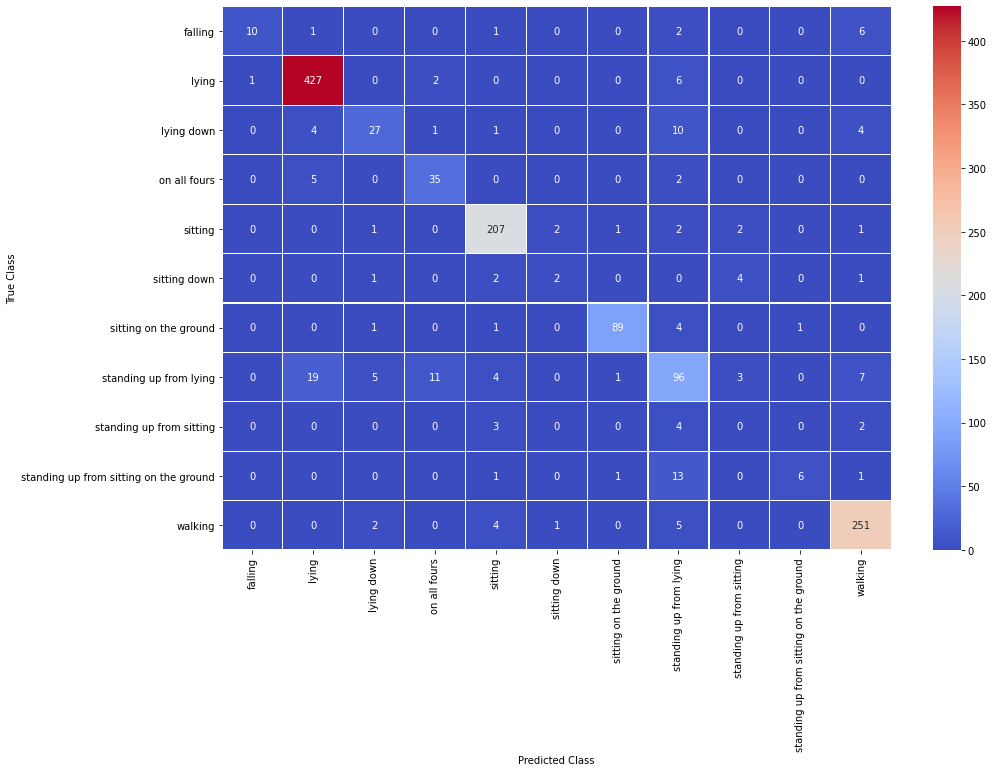

In [118]:
# 4.7. Adaboost - All Attributes
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
n_estimators = [1000]
param_grid = {'n_estimators':n_estimators}
adb_RA_BA_AA = AdaBoostClassifier(DecisionTreeClassifier(max_depth=16), random_state=42)
adb_RA_BA_AA_cv = GridSearchCV(adb_RA_BA_AA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
adb_RA_BA_AA_cv.fit(X_train_RA_BA_AA_scaled_smote, y_RA_BA_AA_smote)
print('Adaboost on All Attributes')
print('Cross Validation Accuracy:', adb_RA_BA_AA_cv.best_score_)
print('Best parameter from Cross Validation:', adb_RA_BA_AA_cv.best_params_)
X_test_RA_BA_AA_scaled = scaler_RA_BA_AA.transform(X_test_RA_BA_AA)
y_pred_RA_BA_AA_adb = adb_RA_BA_AA_cv.predict(X_test_RA_BA_AA_scaled)
print('Accuracy:', accuracy_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_adb))
print('Precision for fall:', precision_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_adb, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_adb, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA_BA_AA, y_pred_RA_BA_AA_adb, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA_BA_AA, y_pred_RA_BA_AA_adb, labels=adb_RA_BA_AA_cv.classes_), 
            annot=True, fmt='d', xticklabels=adb_RA_BA_AA_cv.classes_, yticklabels=adb_RA_BA_AA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [ ]:
# 5.1. XGBoost - Referenece Attributes
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
learning_rate = [.01, .1, 1]
max_depth = list(np.arange(3,11,1))
param_grid = {'learning_rate':learning_rate, 'max_depth':max_depth}
xgb_RA = xgb.XGBClassifier(n_jobs=-1, n_estimators=1000)
xgb_RA_cv = GridSearchCV(xgb_RA, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
xgb_RA_cv.fit(X_train_RA_scaled_smote, y_RA_smote)
print('XGBoost on Reference Attributes')
print('Cross Validation Accuracy:', xgb_RA_cv.best_score_)
print('Best parameter from Cross Validation:', xgb_RA_cv.best_params_)
X_test_RA_scaled = scaler_RA.transform(X_test_RA)
y_pred_RA_xgb = xgb_RA_cv.predict(X_test_RA_scaled)
print('Accuracy:', accuracy_score(y_test_RA, y_pred_RA_xgb))
print('Precision for fall:', precision_score(y_test_RA, y_pred_RA_xgb, average=None)[0])
print('Recall for fall:', recall_score(y_test_RA, y_pred_RA_xgb, average=None)[0])
print('F1-score for fall:', f1_score(y_test_RA, y_pred_RA_xgb, average=None)[0])
_ = plt.subplots(figsize= (15,10))
_ = sns.heatmap(confusion_matrix(y_test_RA, y_pred_RA_xgb, labels=xgb_RA_cv.classes_), 
            annot=True, fmt='d', xticklabels=xgb_RA_cv.classes_, yticklabels=xgb_RA_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()